# Clique Analysis
Conducting a clique analysis of a network graph involves identifying and analyzing the cliques within the graph. A clique is a subset of nodes in a graph where every node is directly connected to every other node within the subset. 

In [29]:
import pandas as pd
import numpy as np
from os.path import join
import os

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("../data/final_token_selection.csv")


In [30]:
import sys
sys.path.append('..') 

from src.analysis.clique_analysis import * 
from src.visualisations.clique_analysis_visualisations import * 

## Create dataframes for each metrics

In [31]:
# Initialize CliquesData
cliques_data_path = join(path, '../data/cliques_data_class.pkl')
cliques_data = CliquesData(cliques_data_path)

# Use the metric_names attribute from CliquesData
metric_names = cliques_data.metric_names

# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {
        'upper_bound': {'sample': {},'control': {},'pvalues': {}, 'sample_directional':{}, 'control_directional':{}, 'pvalues_directional':{}}, # change to adjust nomencalture to we upper to weak 
        'lower_bound': {'sample': {},'control': {},'pvalues': {}, 'sample_directional':{}, 'control_directional':{}, 'pvalues_directional':{}} # change to adjust nomencalture to we lower to strong 
    }

# Create DataFrames for each metric
for method in ['upper_bound', 'lower_bound']:
    for group in ['sample', 'control', 'pvalues']:
        for metric_name in metric_names:
            metric_dataframes[method][group][metric_name] = cliques_data.get_metric_data(method, group, metric_name)

## Figure Generation

### Fig: Size of Clique 

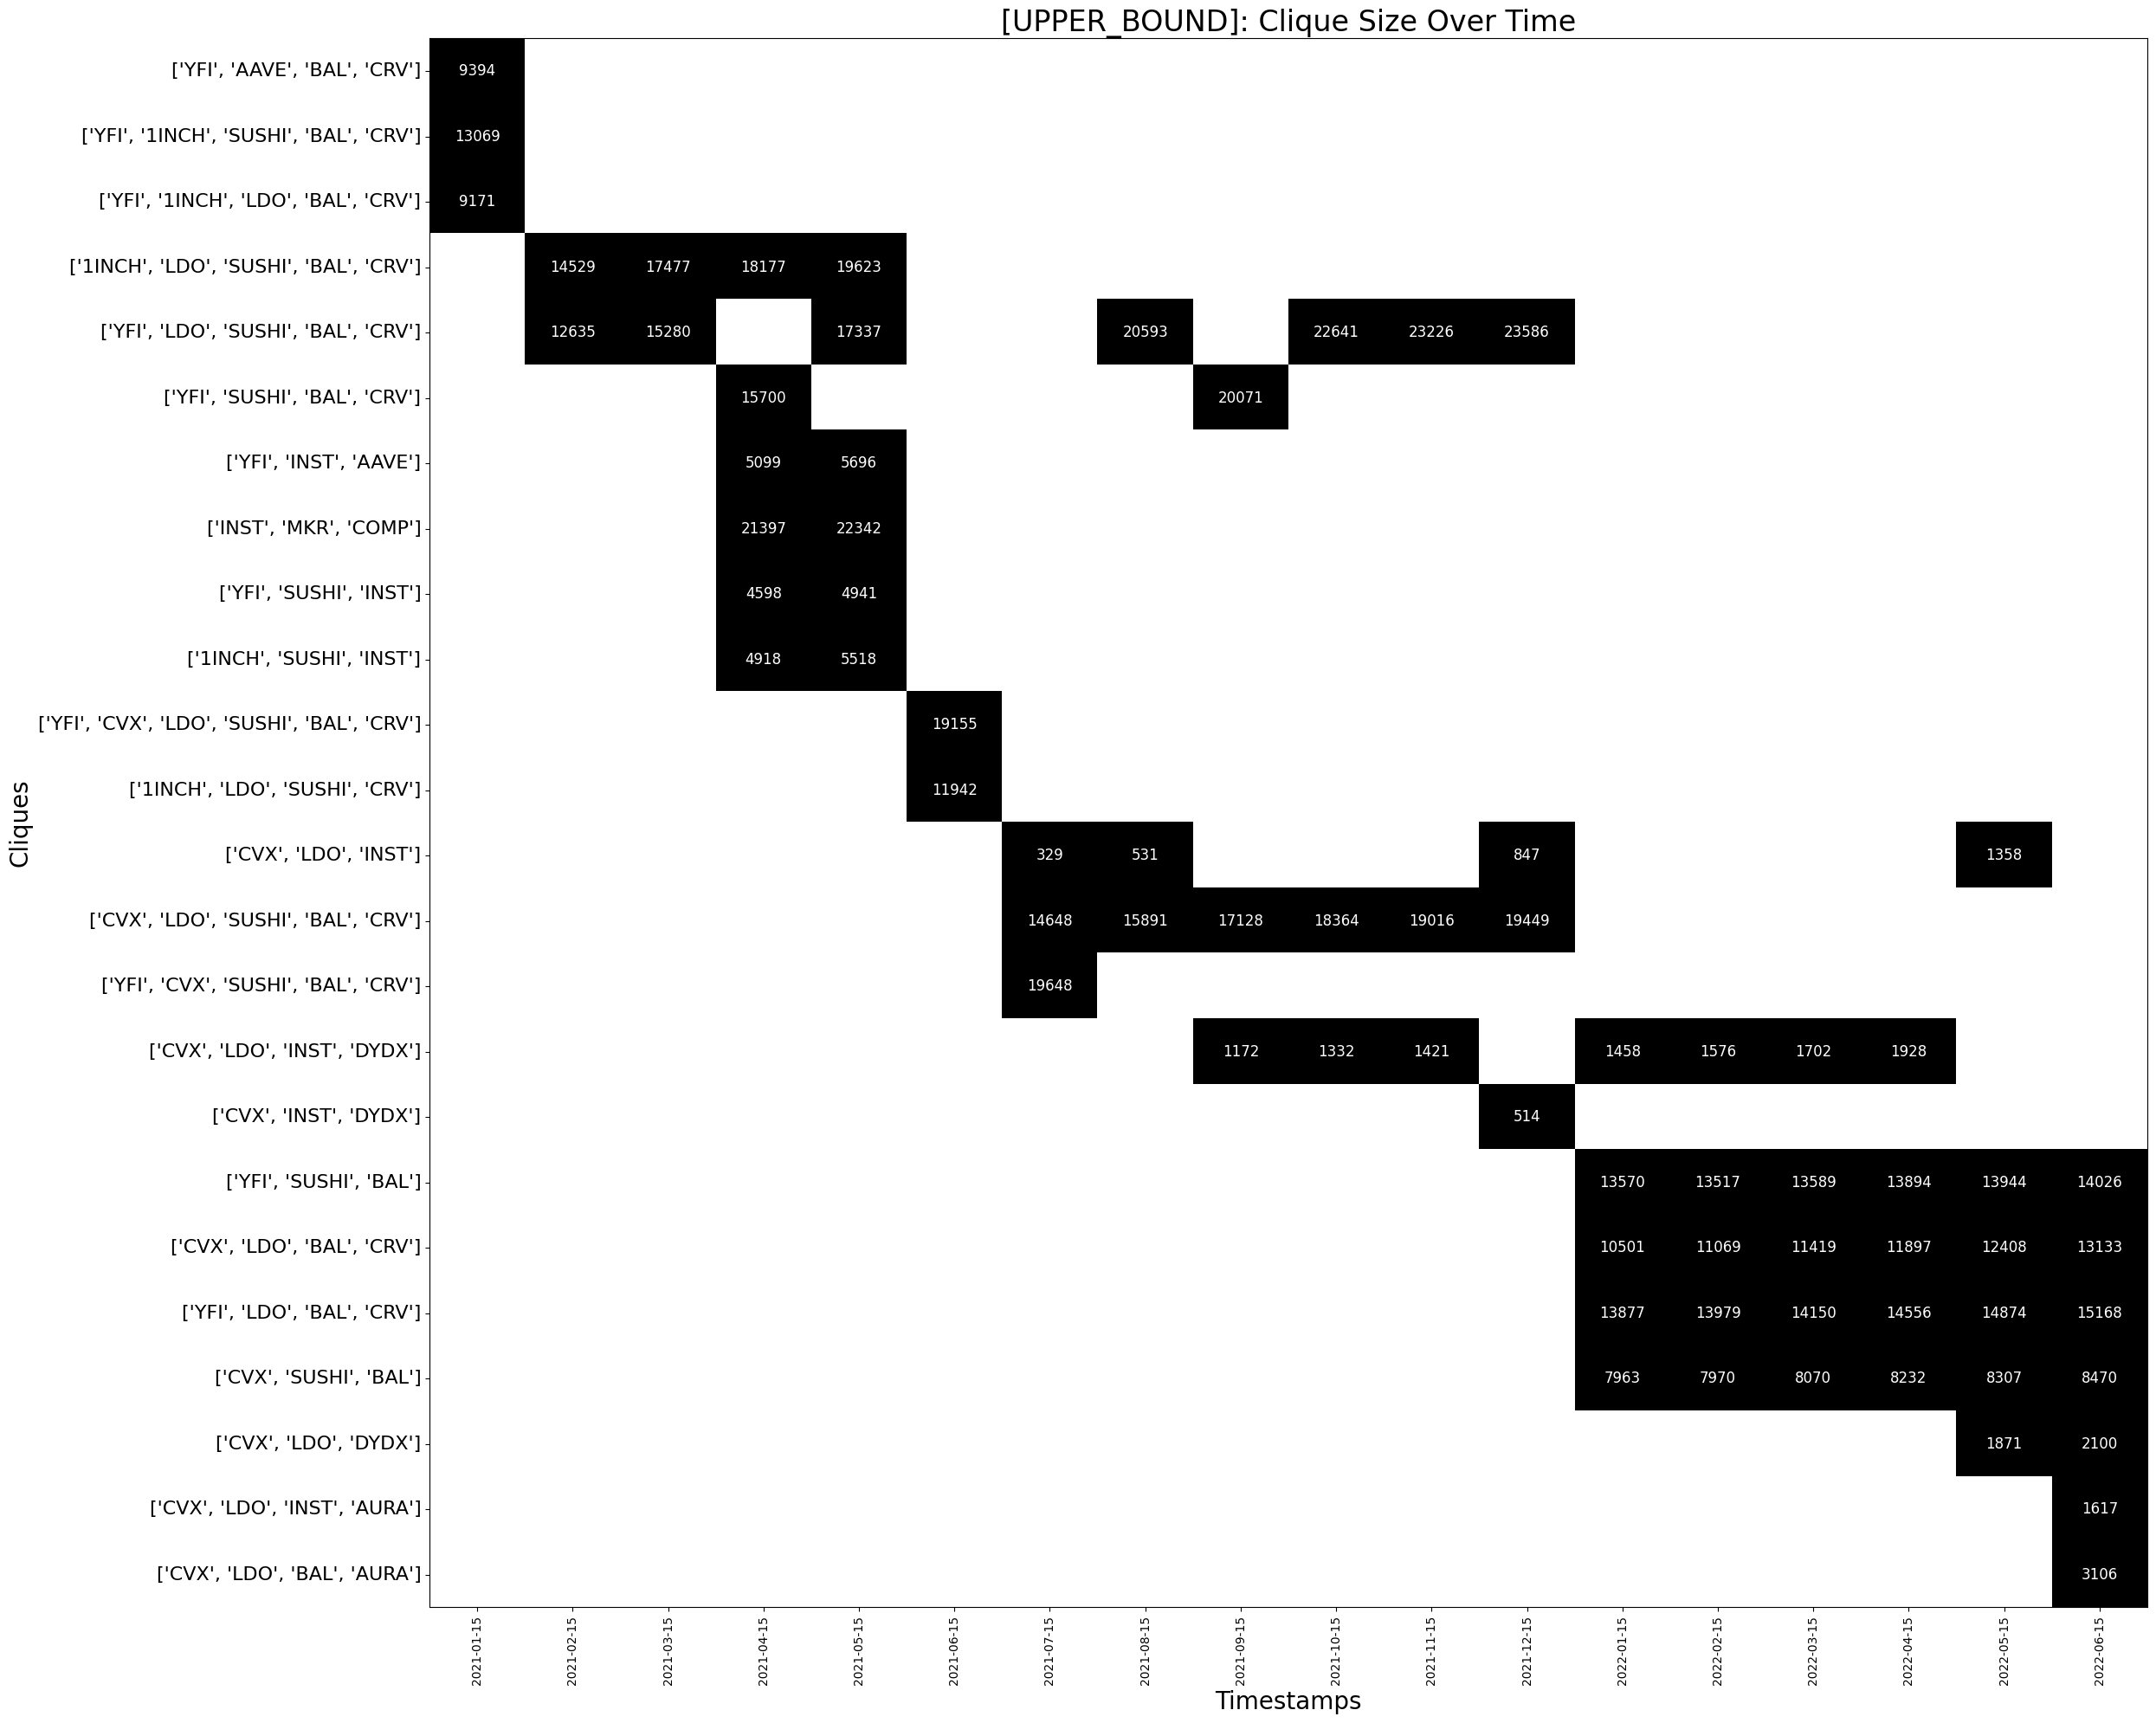

In [32]:
## show upper_bound
plot_clique_size_over_time(metric_dataframes, method='upper_bound', group='sample', output_path="../output/cliques/", save=False, show=True)

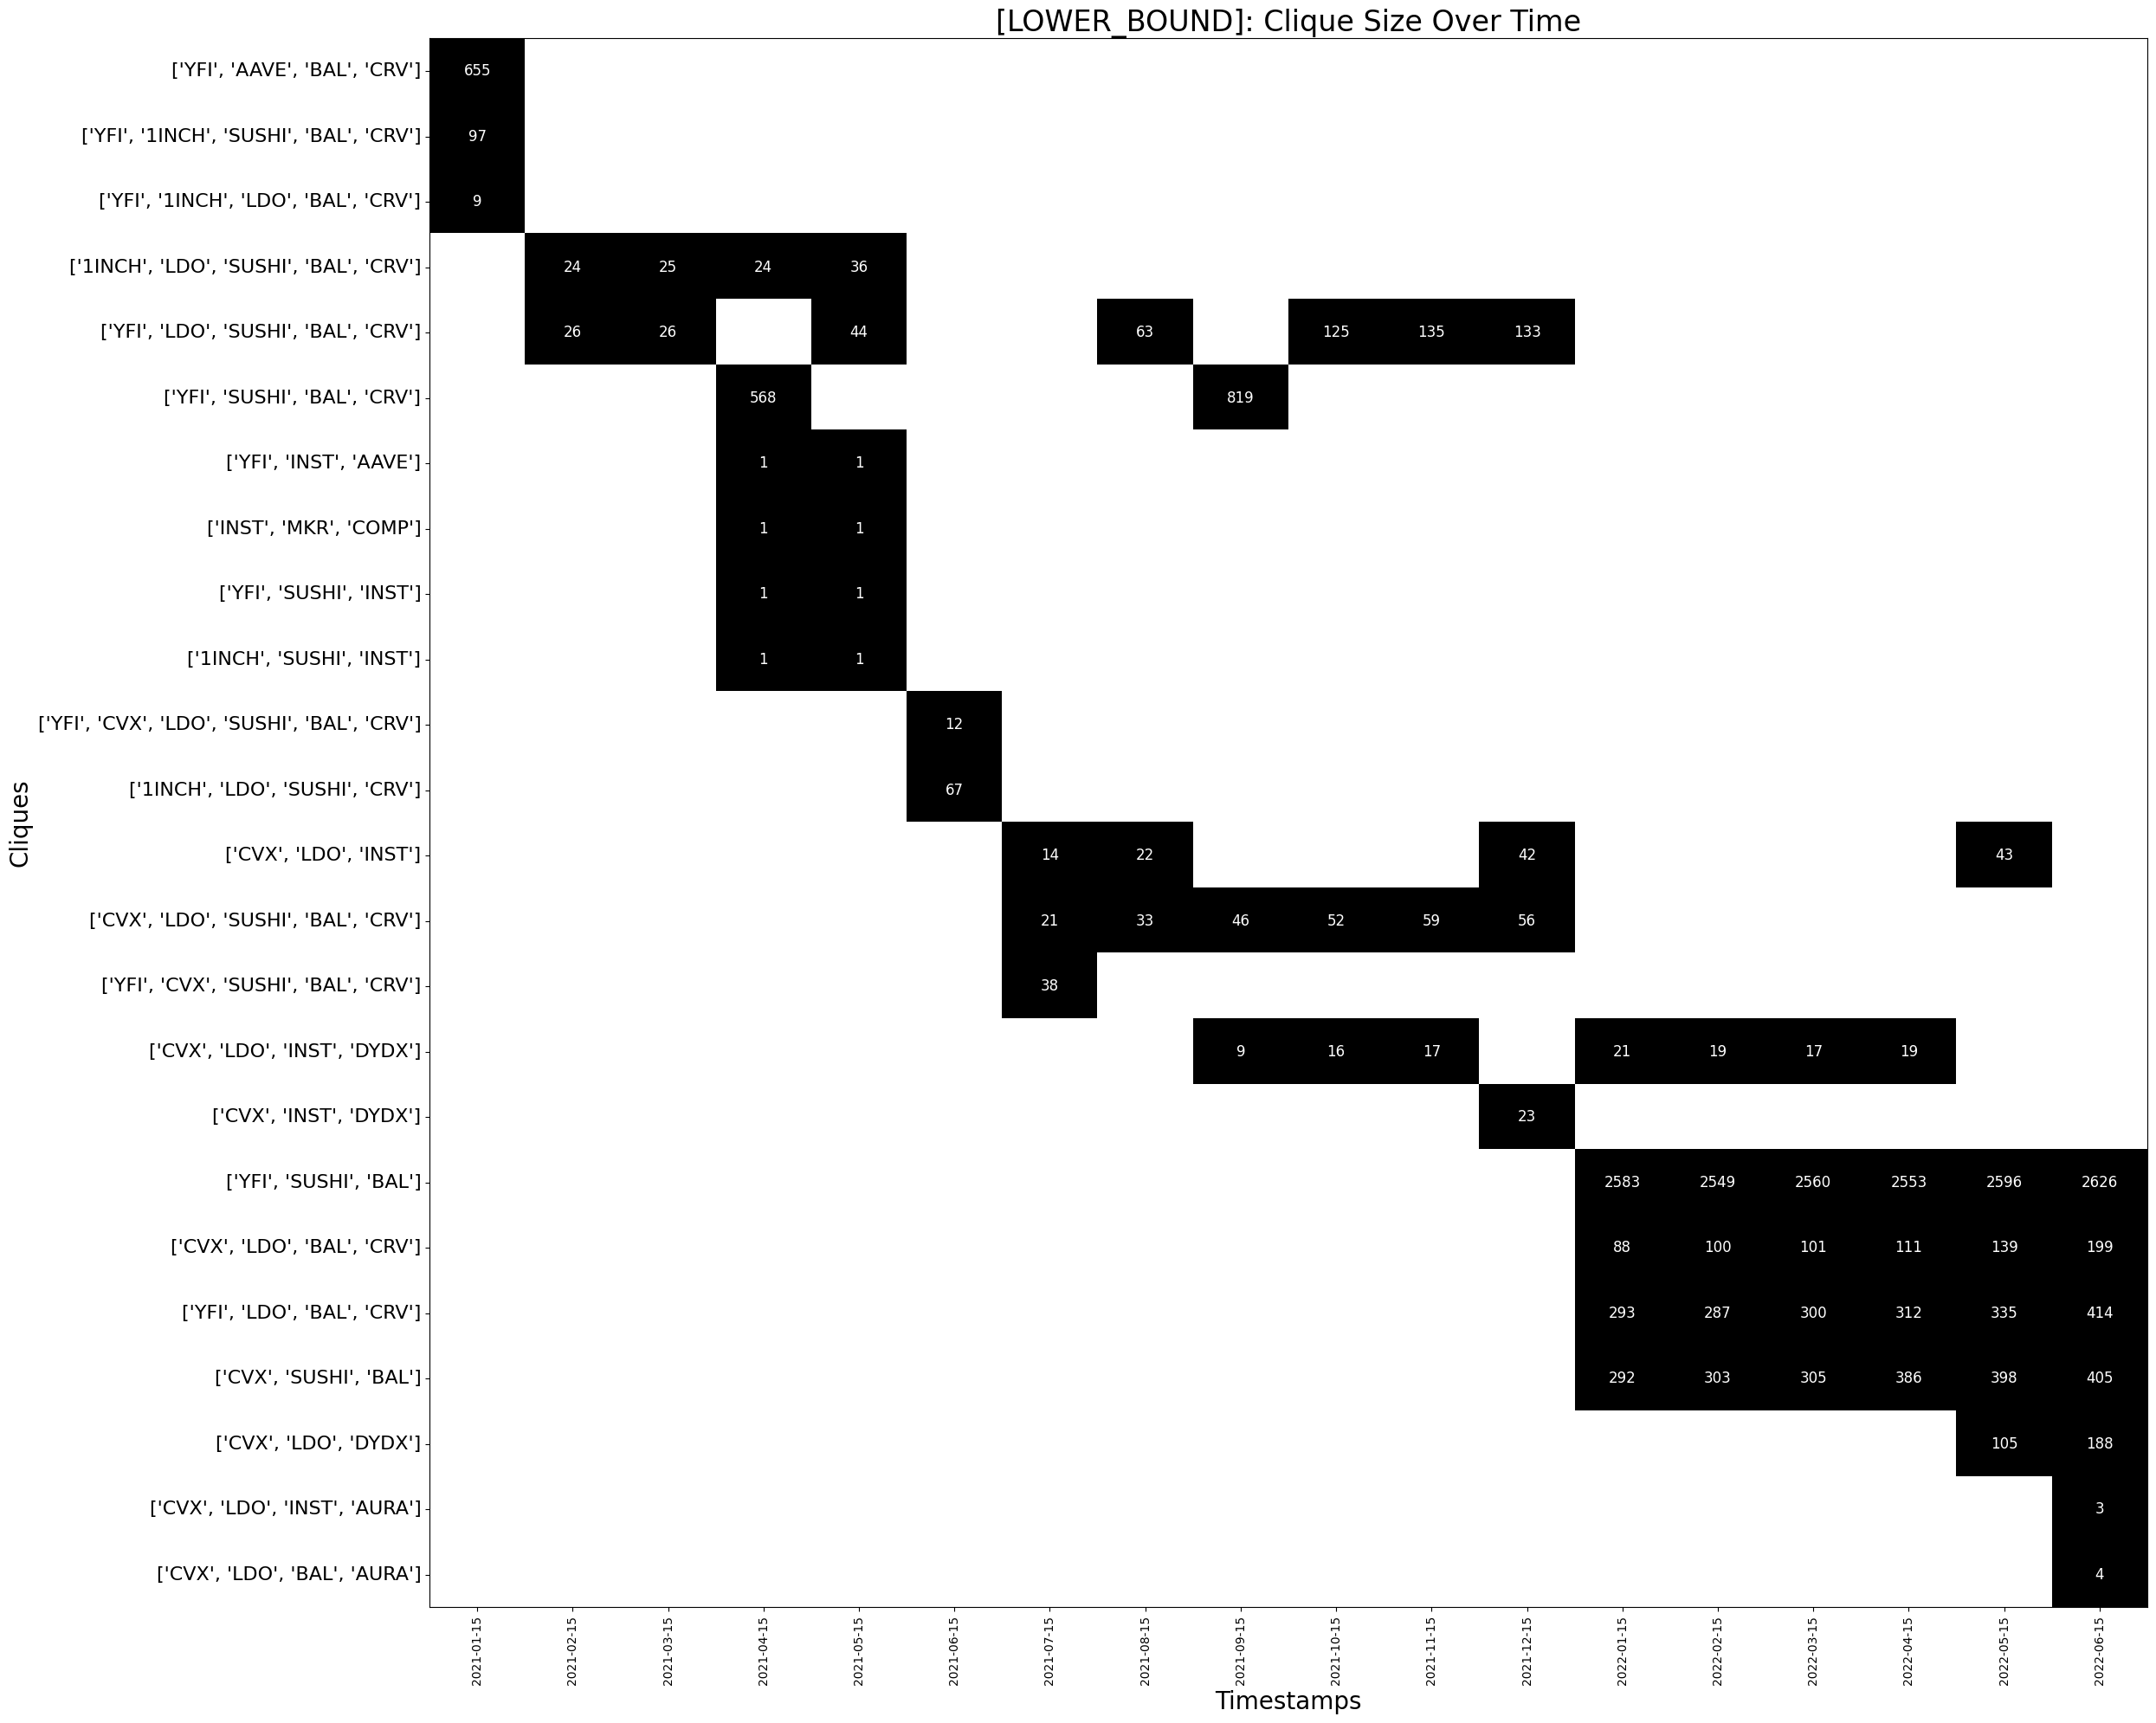

In [33]:
## show lower bound
plot_clique_size_over_time(metric_dataframes, method='lower_bound', group='sample', output_path="../output/cliques/", save=False, show=True)

### Fig: clique growth over time 

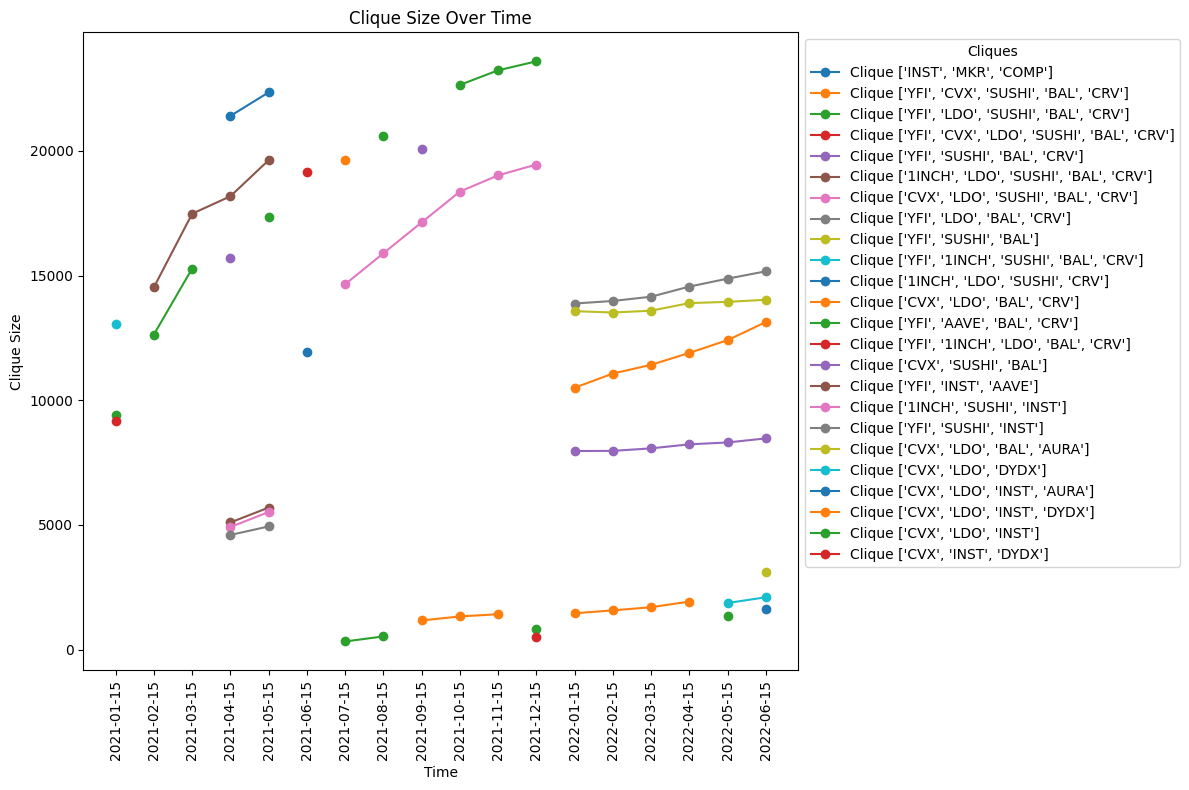

In [34]:
plot_clique_growth_over_time(metric_dataframes, method='upper_bound', group='sample', output_path="../output/cliques/", save=False, show=True)


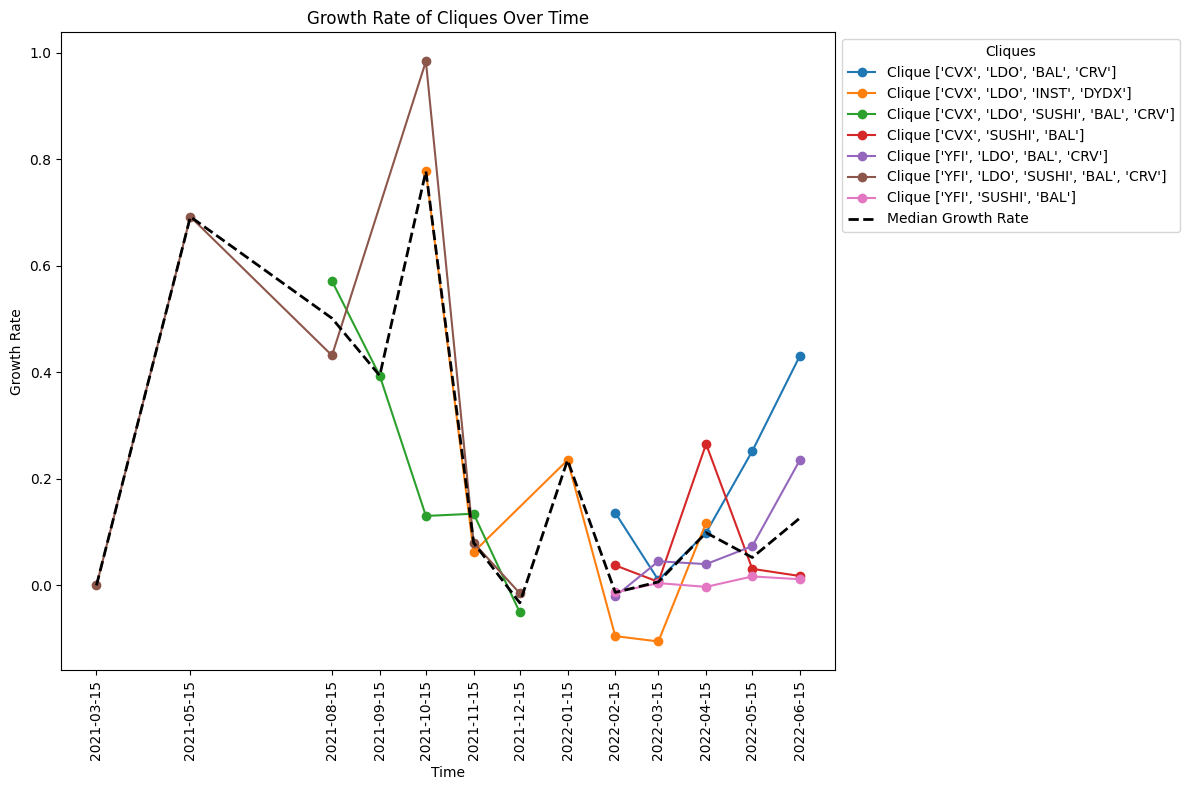

In [37]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_clique_growth_rate_over_time(metric_dataframes, method='lower_bound', group='sample', output_path="output/cliques/", save=False, show=True)


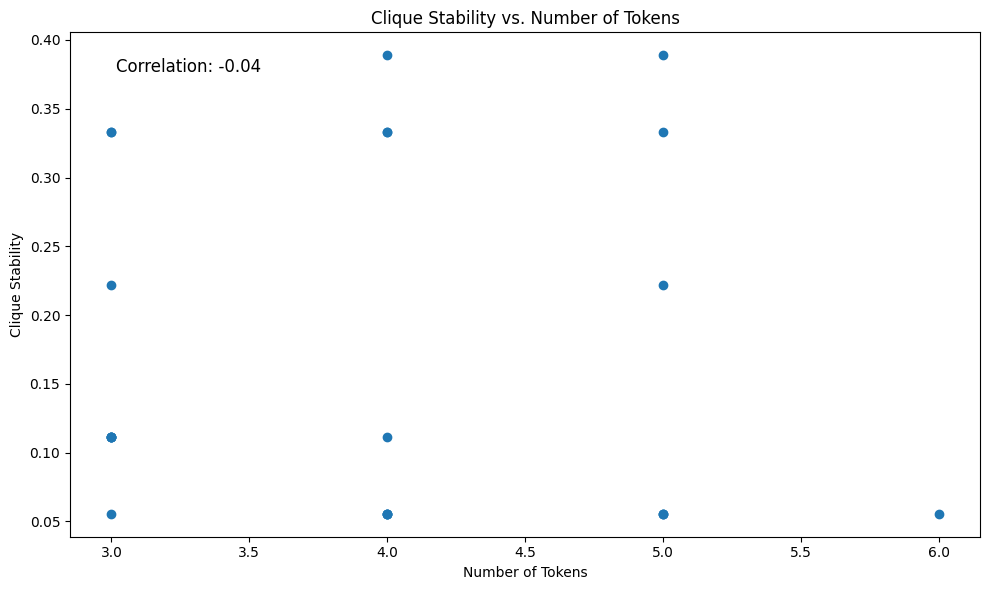

In [39]:
plot_clique_stability_vs_no_of_tokens(metric_dataframes, method='upper_bound', output_path="output/cliques/", save=False, show=True)

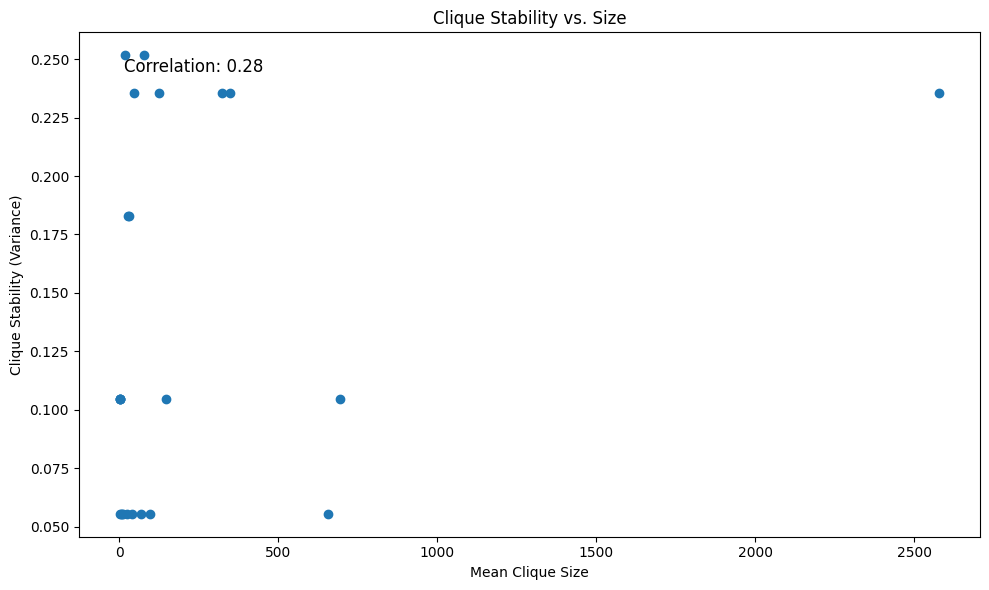

In [40]:
plot_clique_stability_vs_size(metric_dataframes, method='lower_bound', output_path="output/cliques/", save=False, show=True)

### Fig: total_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


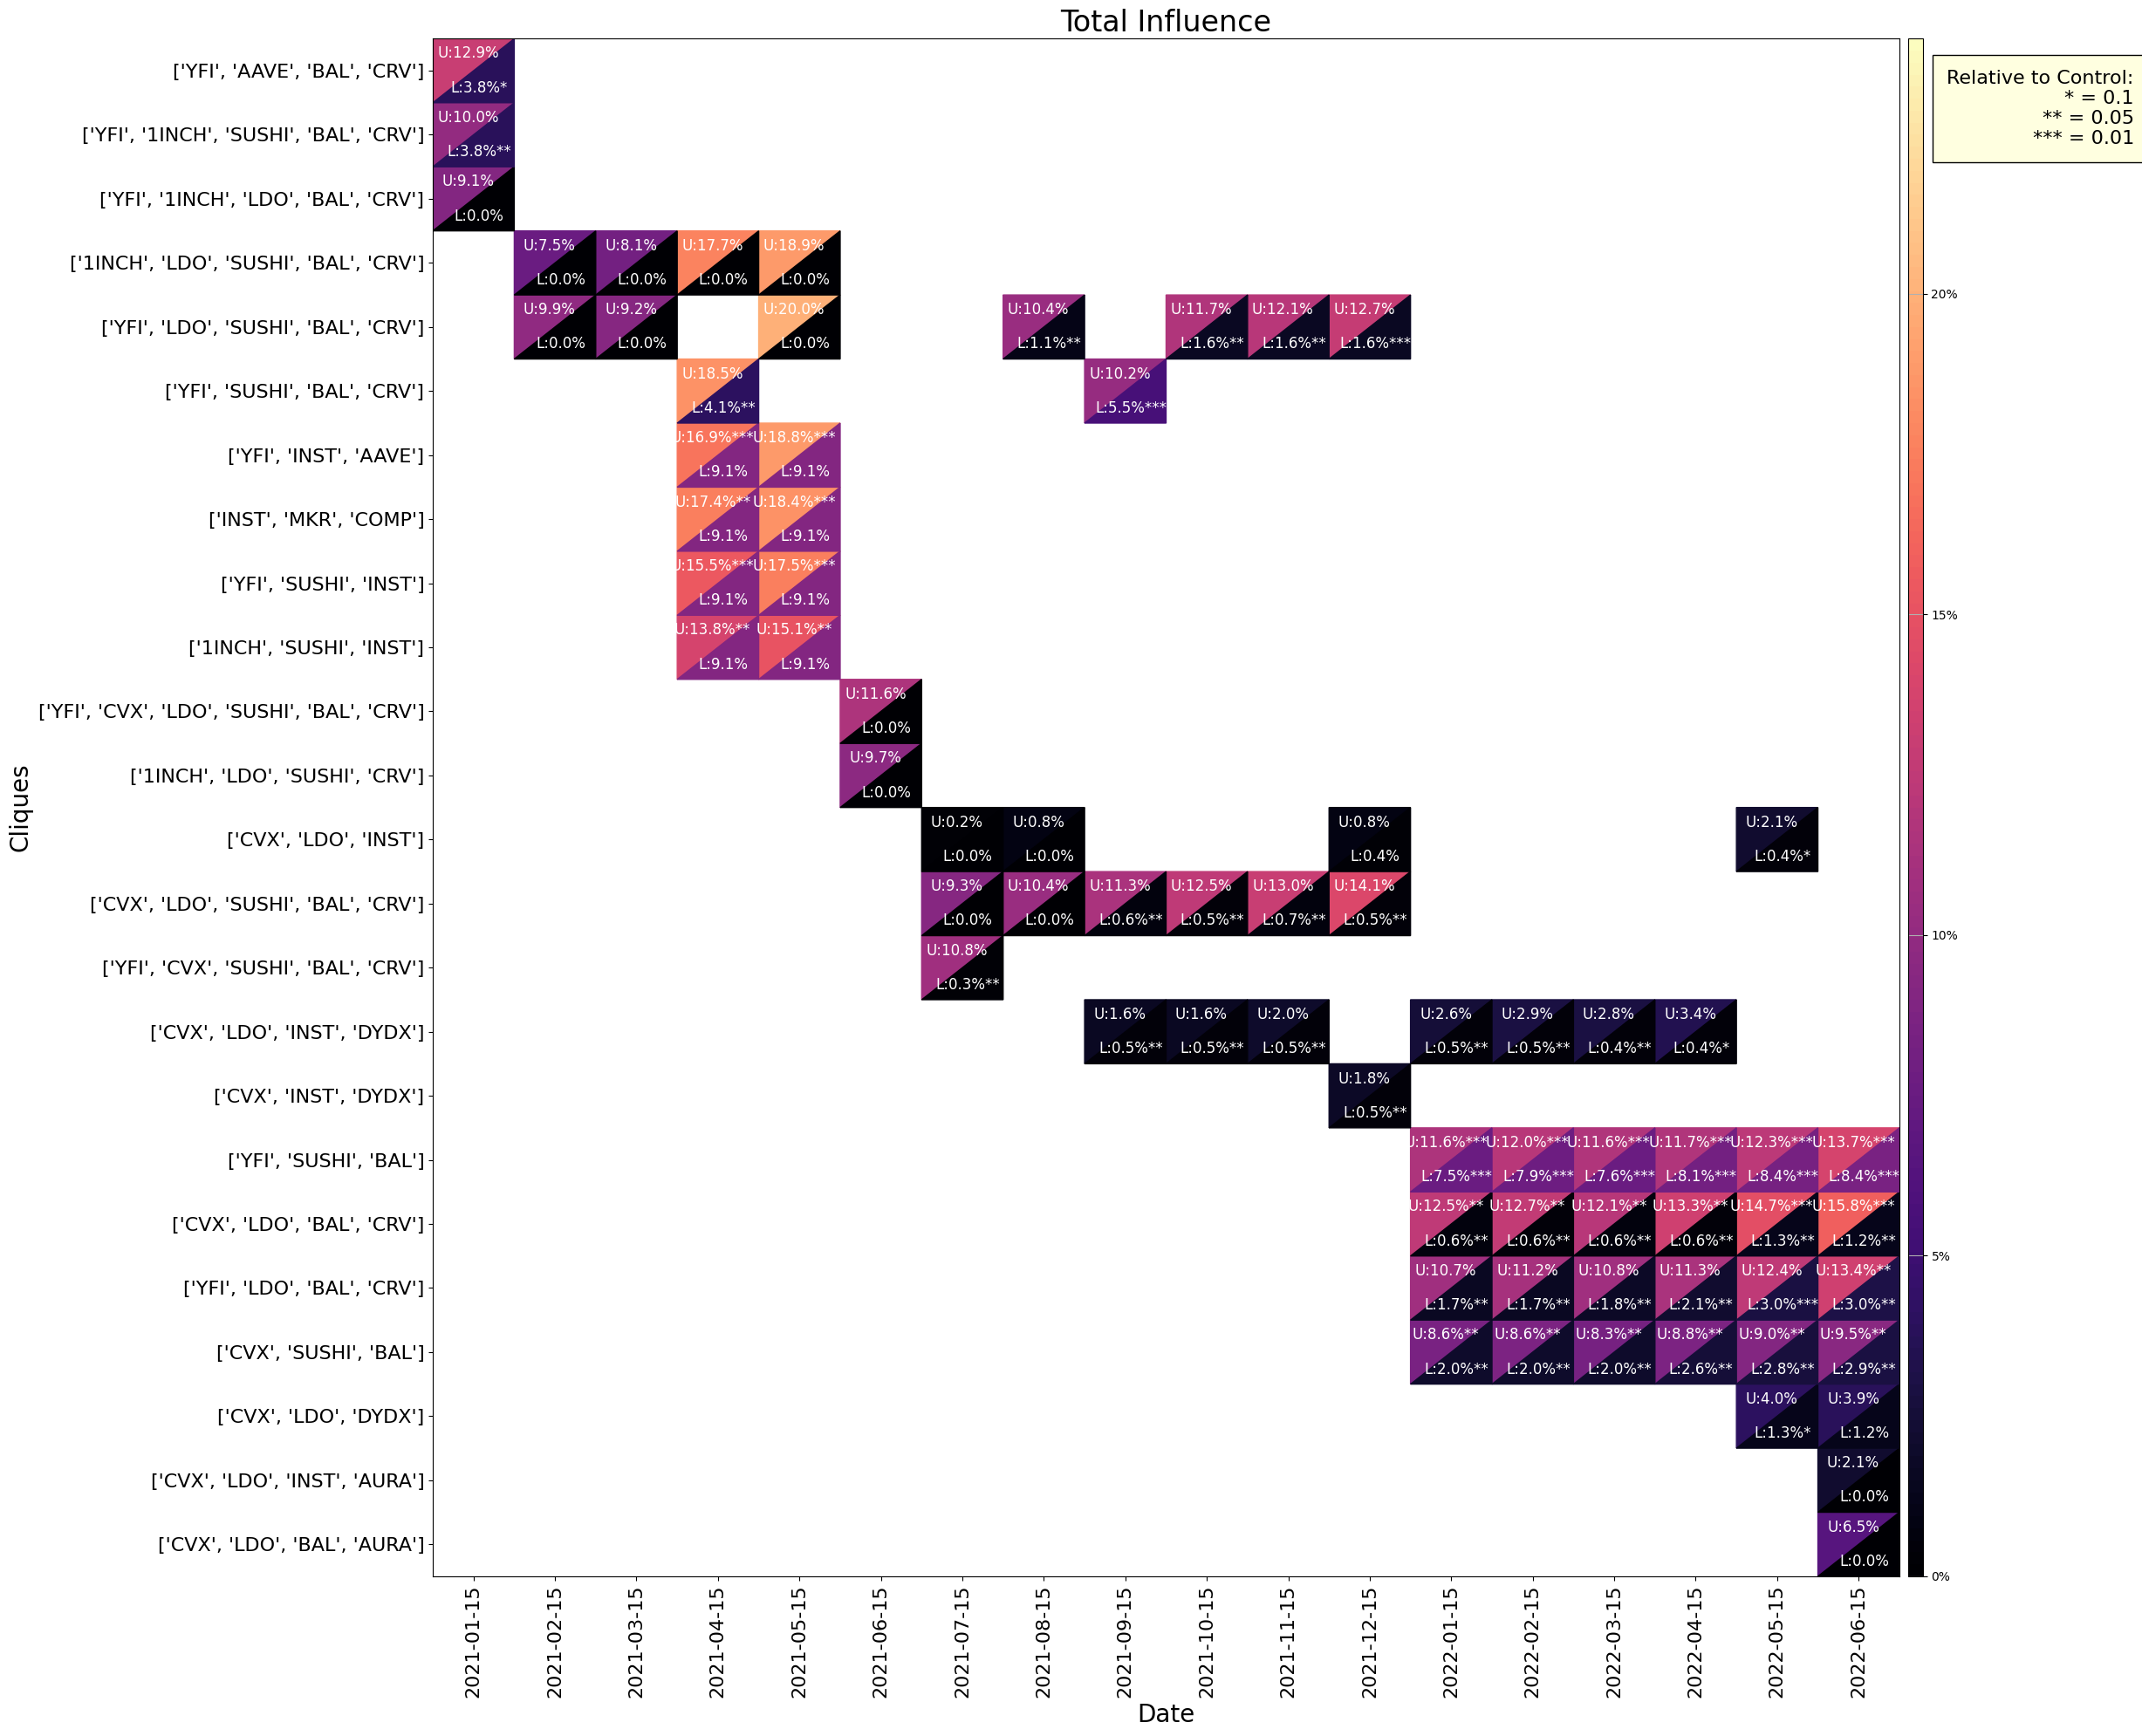

In [41]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_total_influence

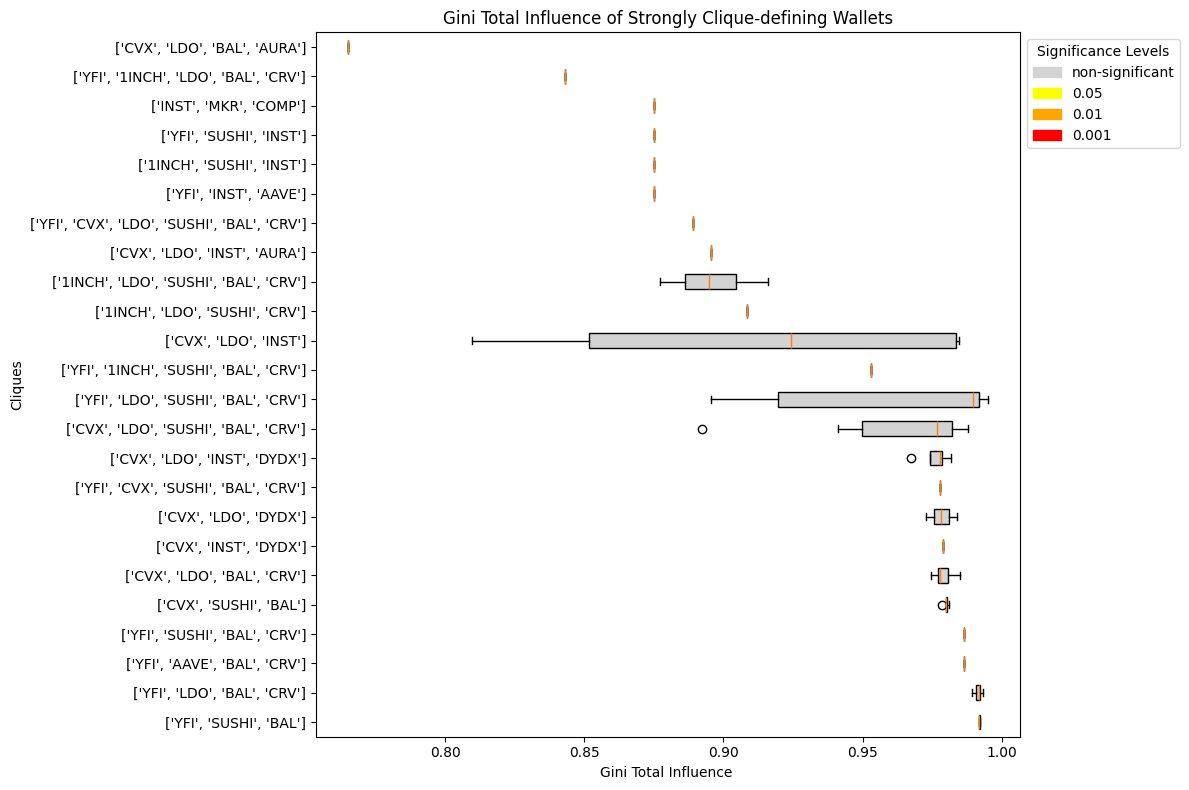

In [45]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='lower_bound', group='sample', output_path="../output/cliques/", save=False, show=True)

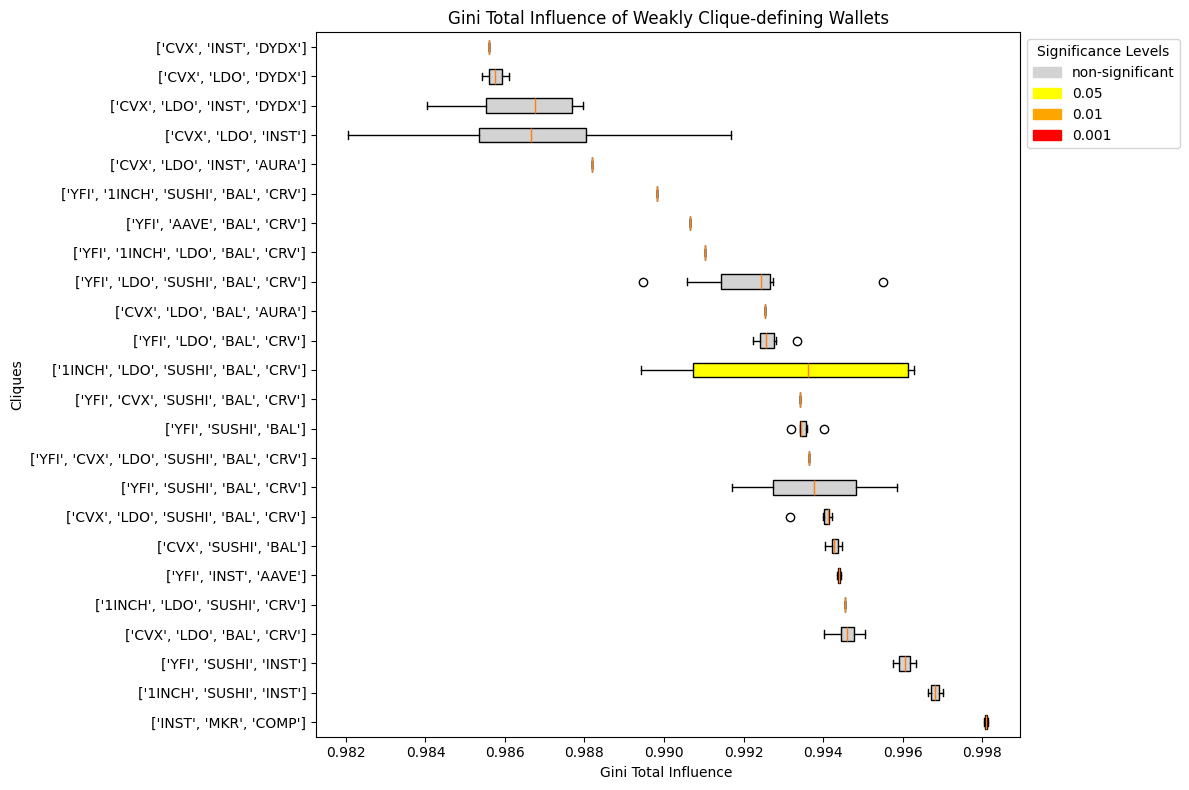

In [44]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='upper_bound', group='sample', output_path="../output/cliques/", save=False, show=True)

### Fig: internal_influence 

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


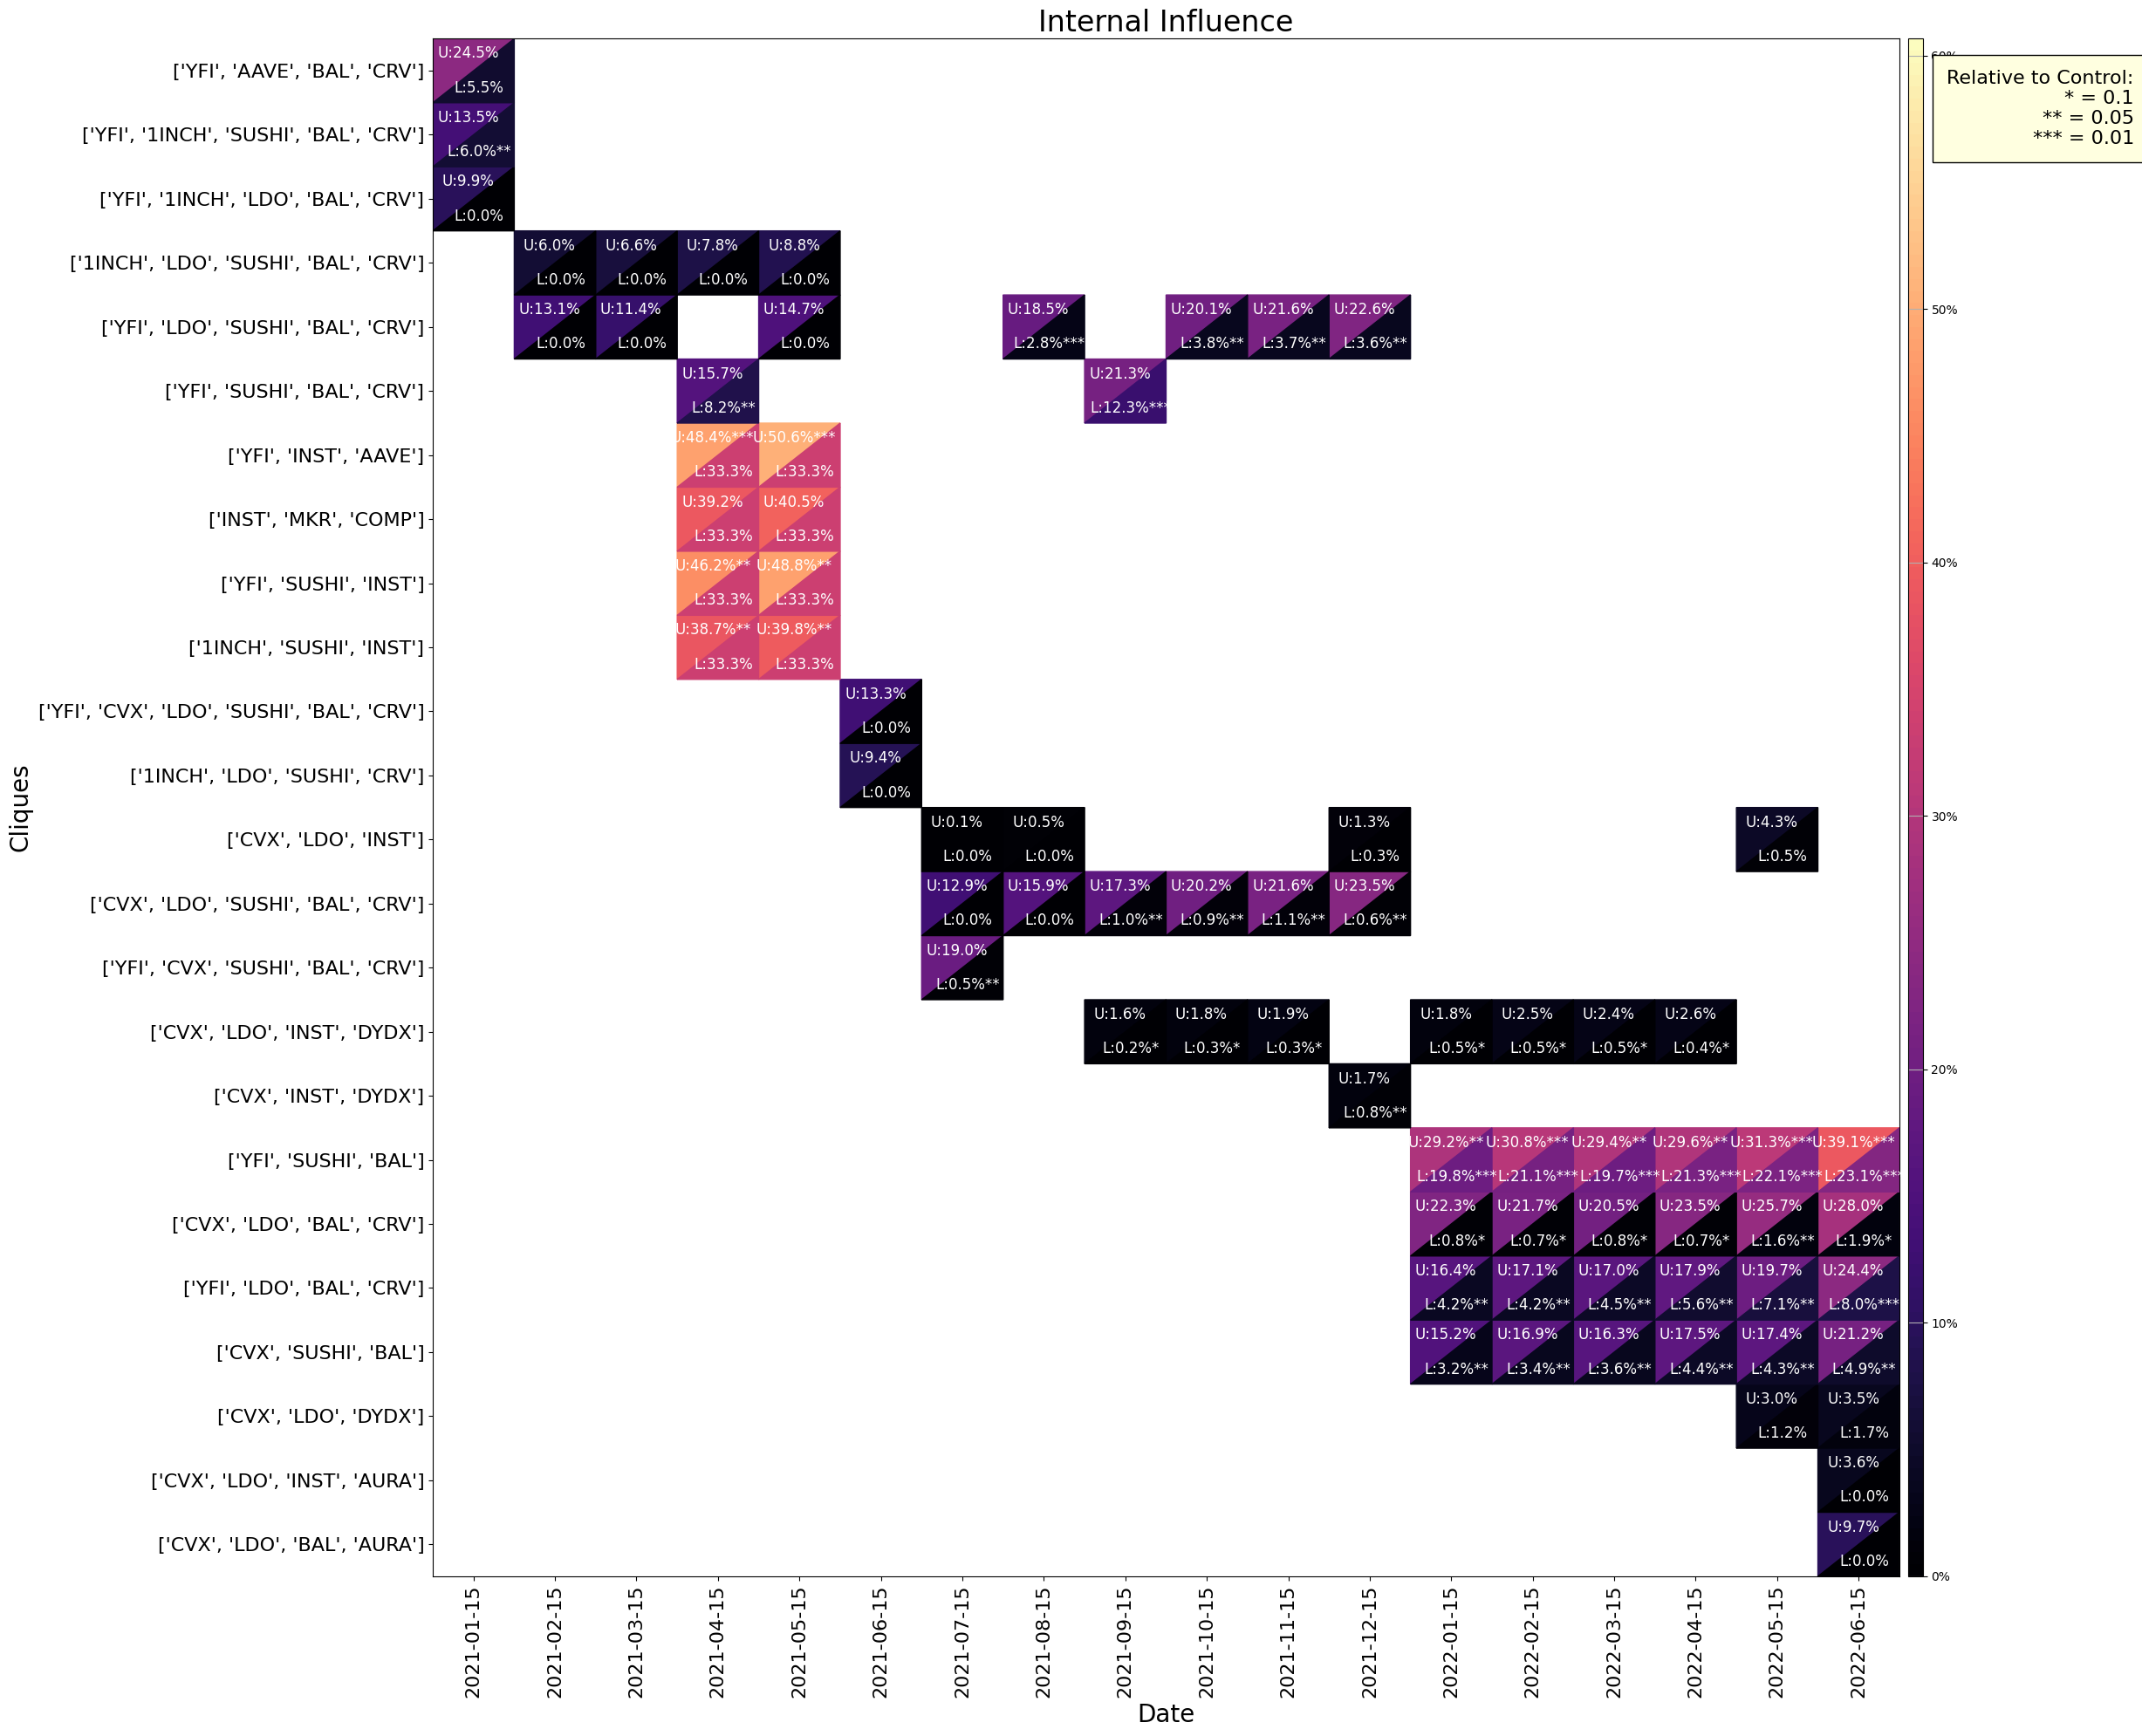

In [46]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_internal_influence

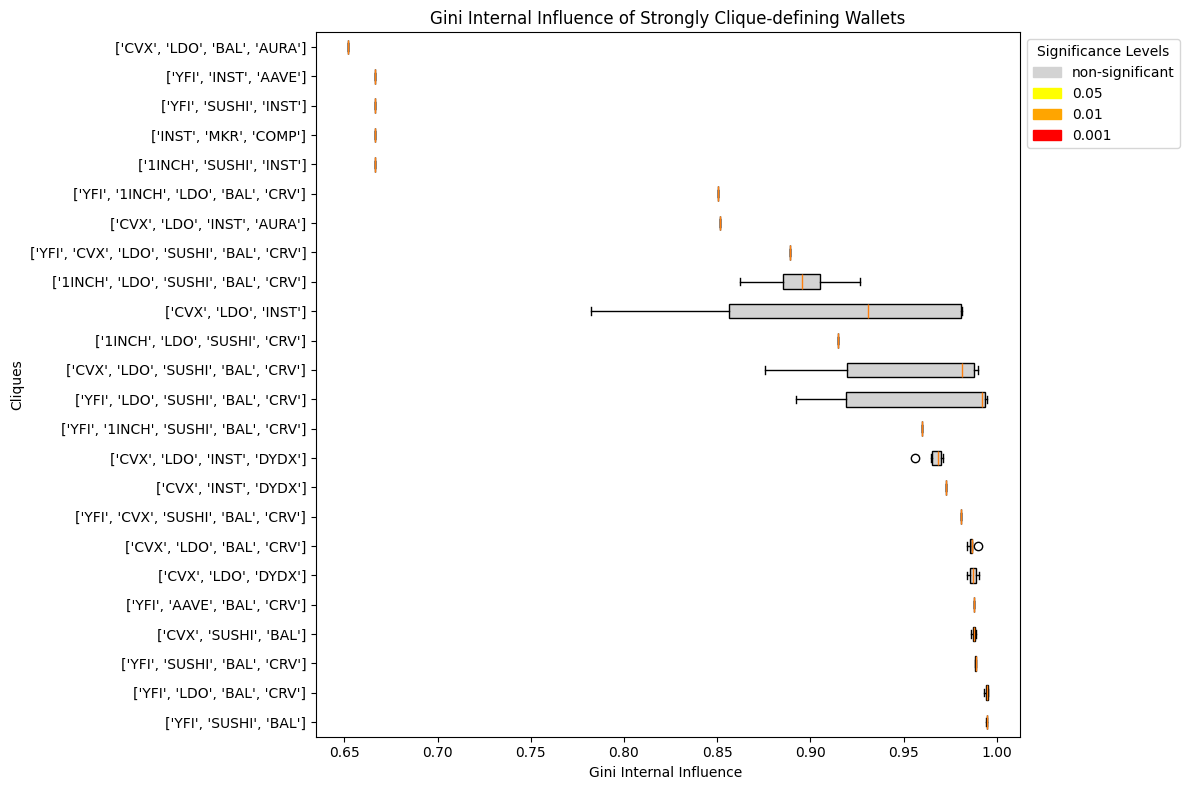

In [47]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='lower_bound', group='sample', output_path="output/cliques/", save=False, show=True)

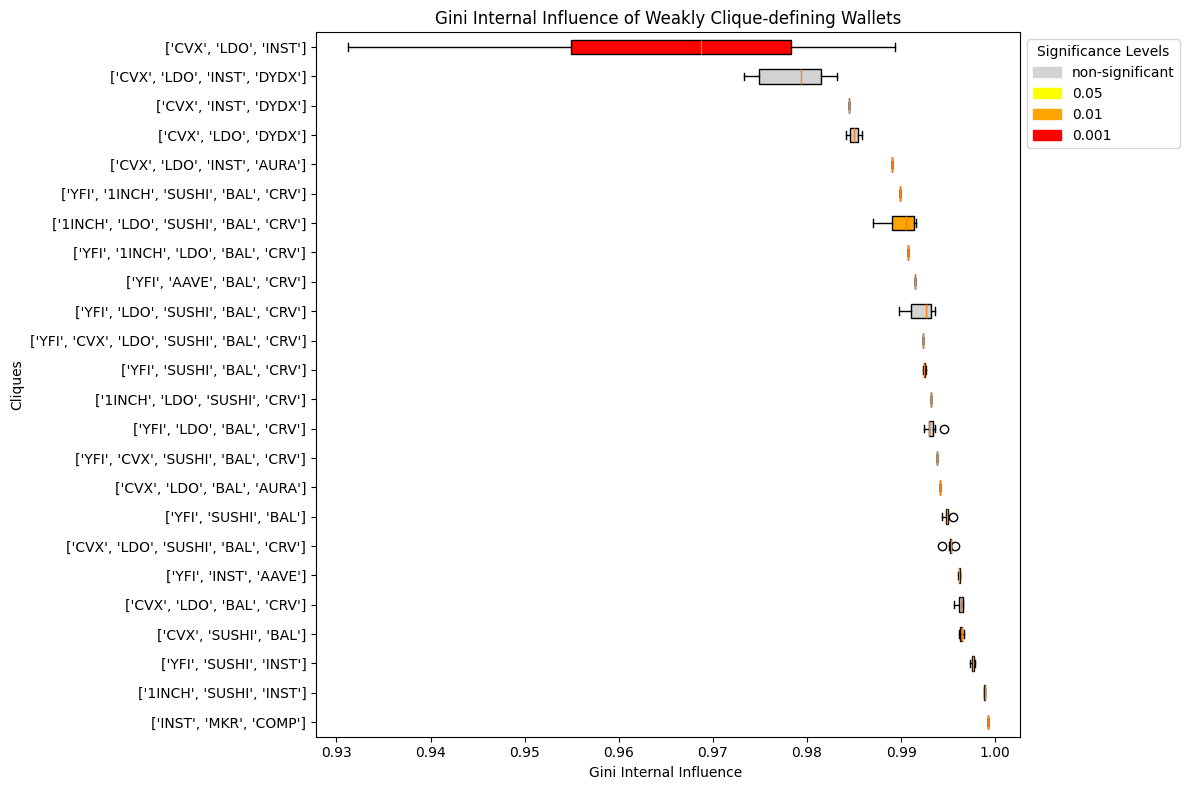

In [48]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='upper_bound', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: external_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


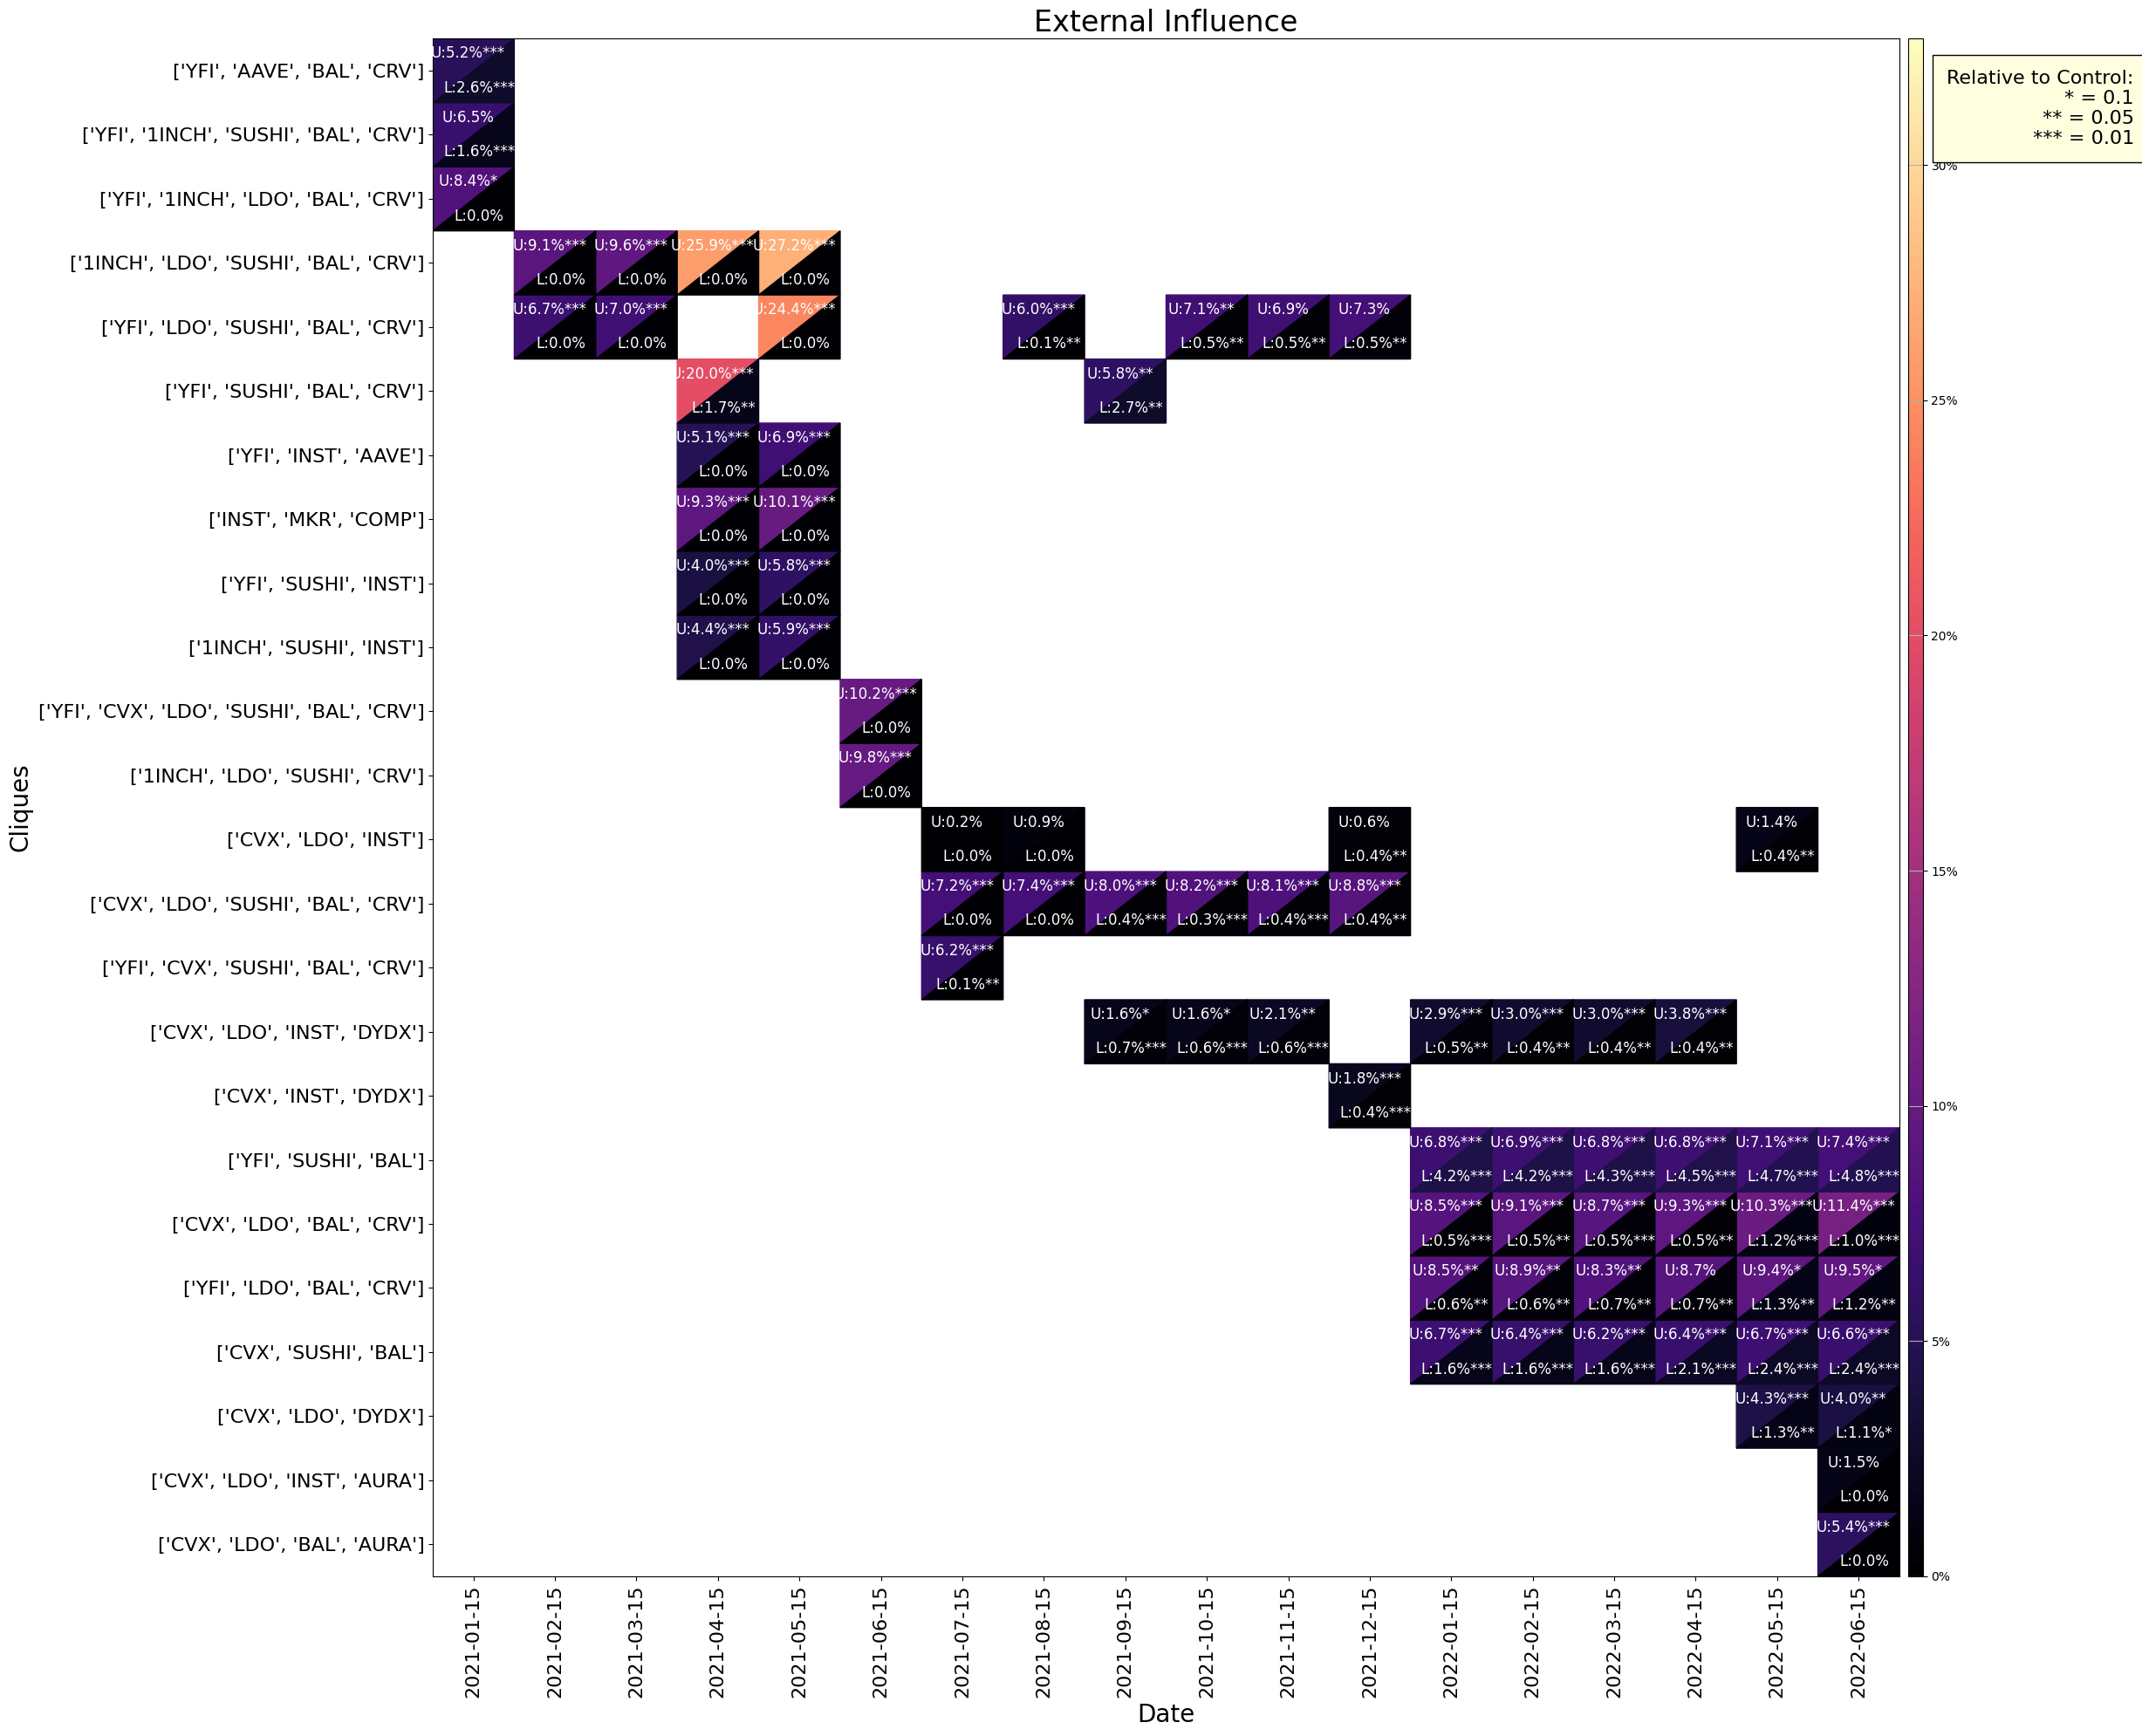

In [49]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_external_influence

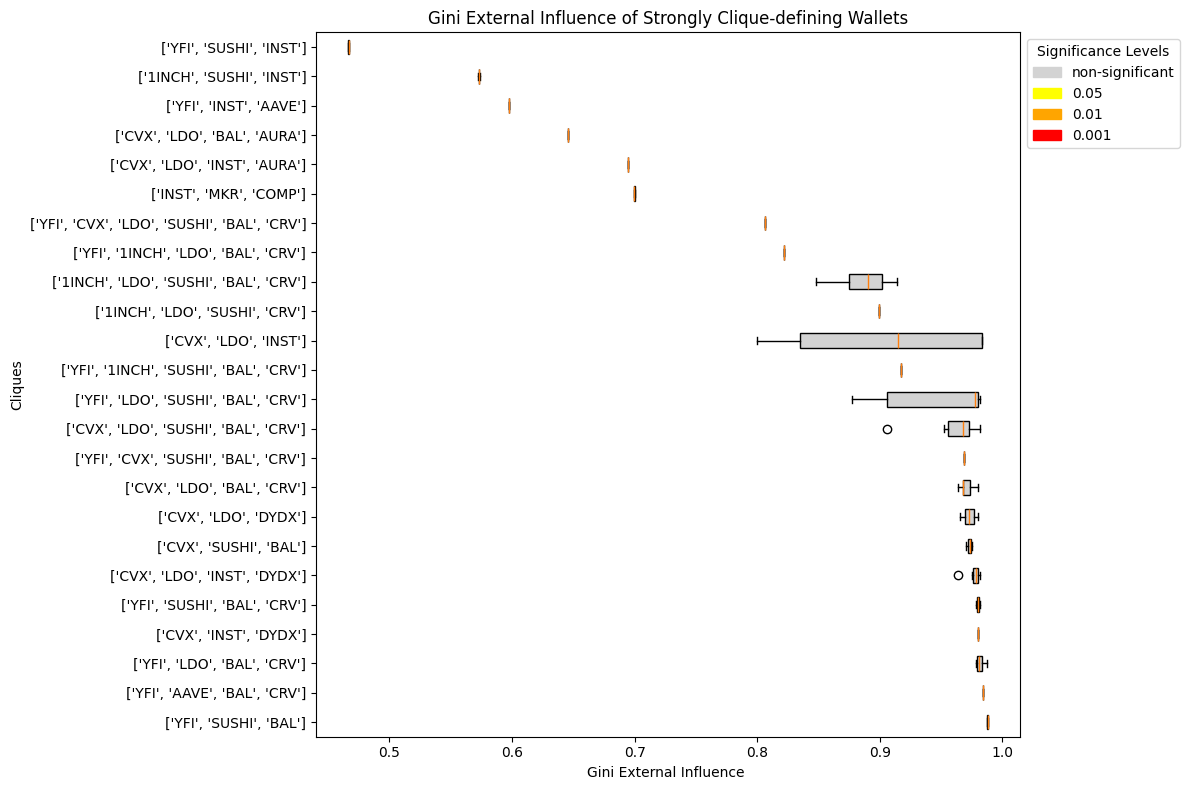

In [50]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='lower_bound', group='sample', output_path="output/cliques/", save=False, show=True)

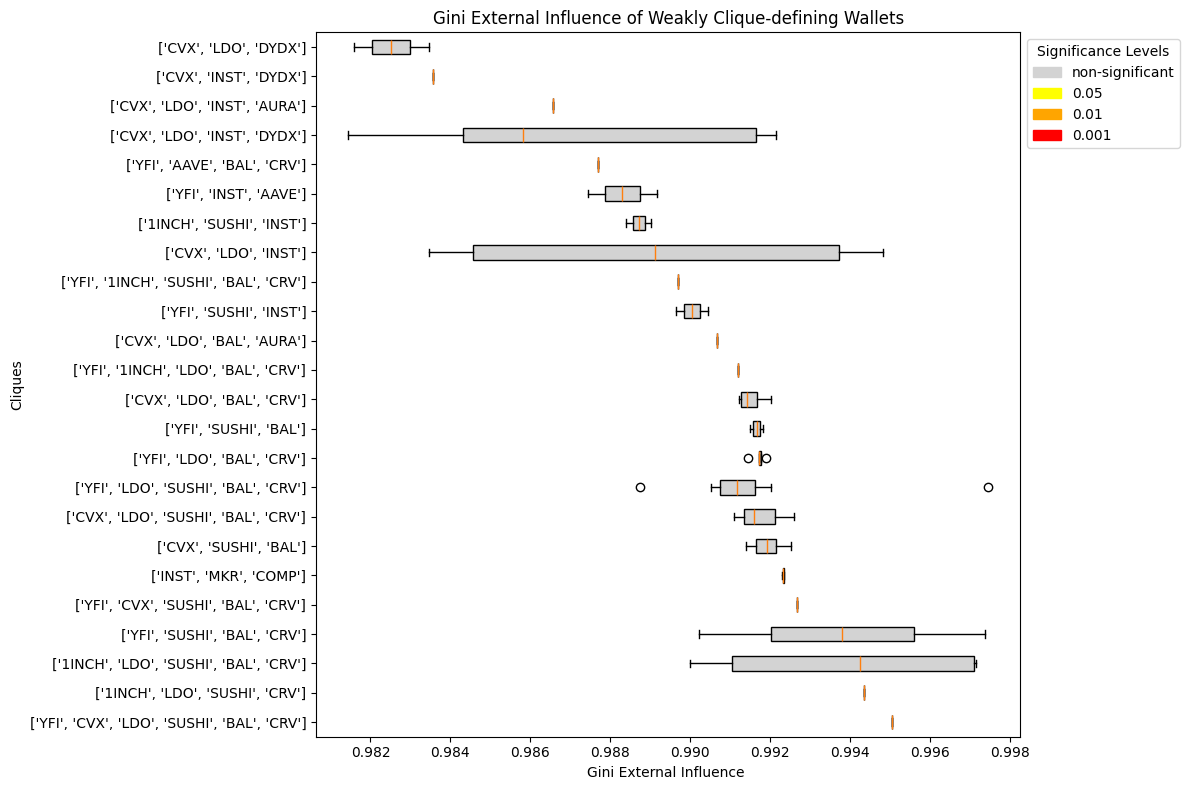

In [52]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='upper_bound', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: wealth_clique

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


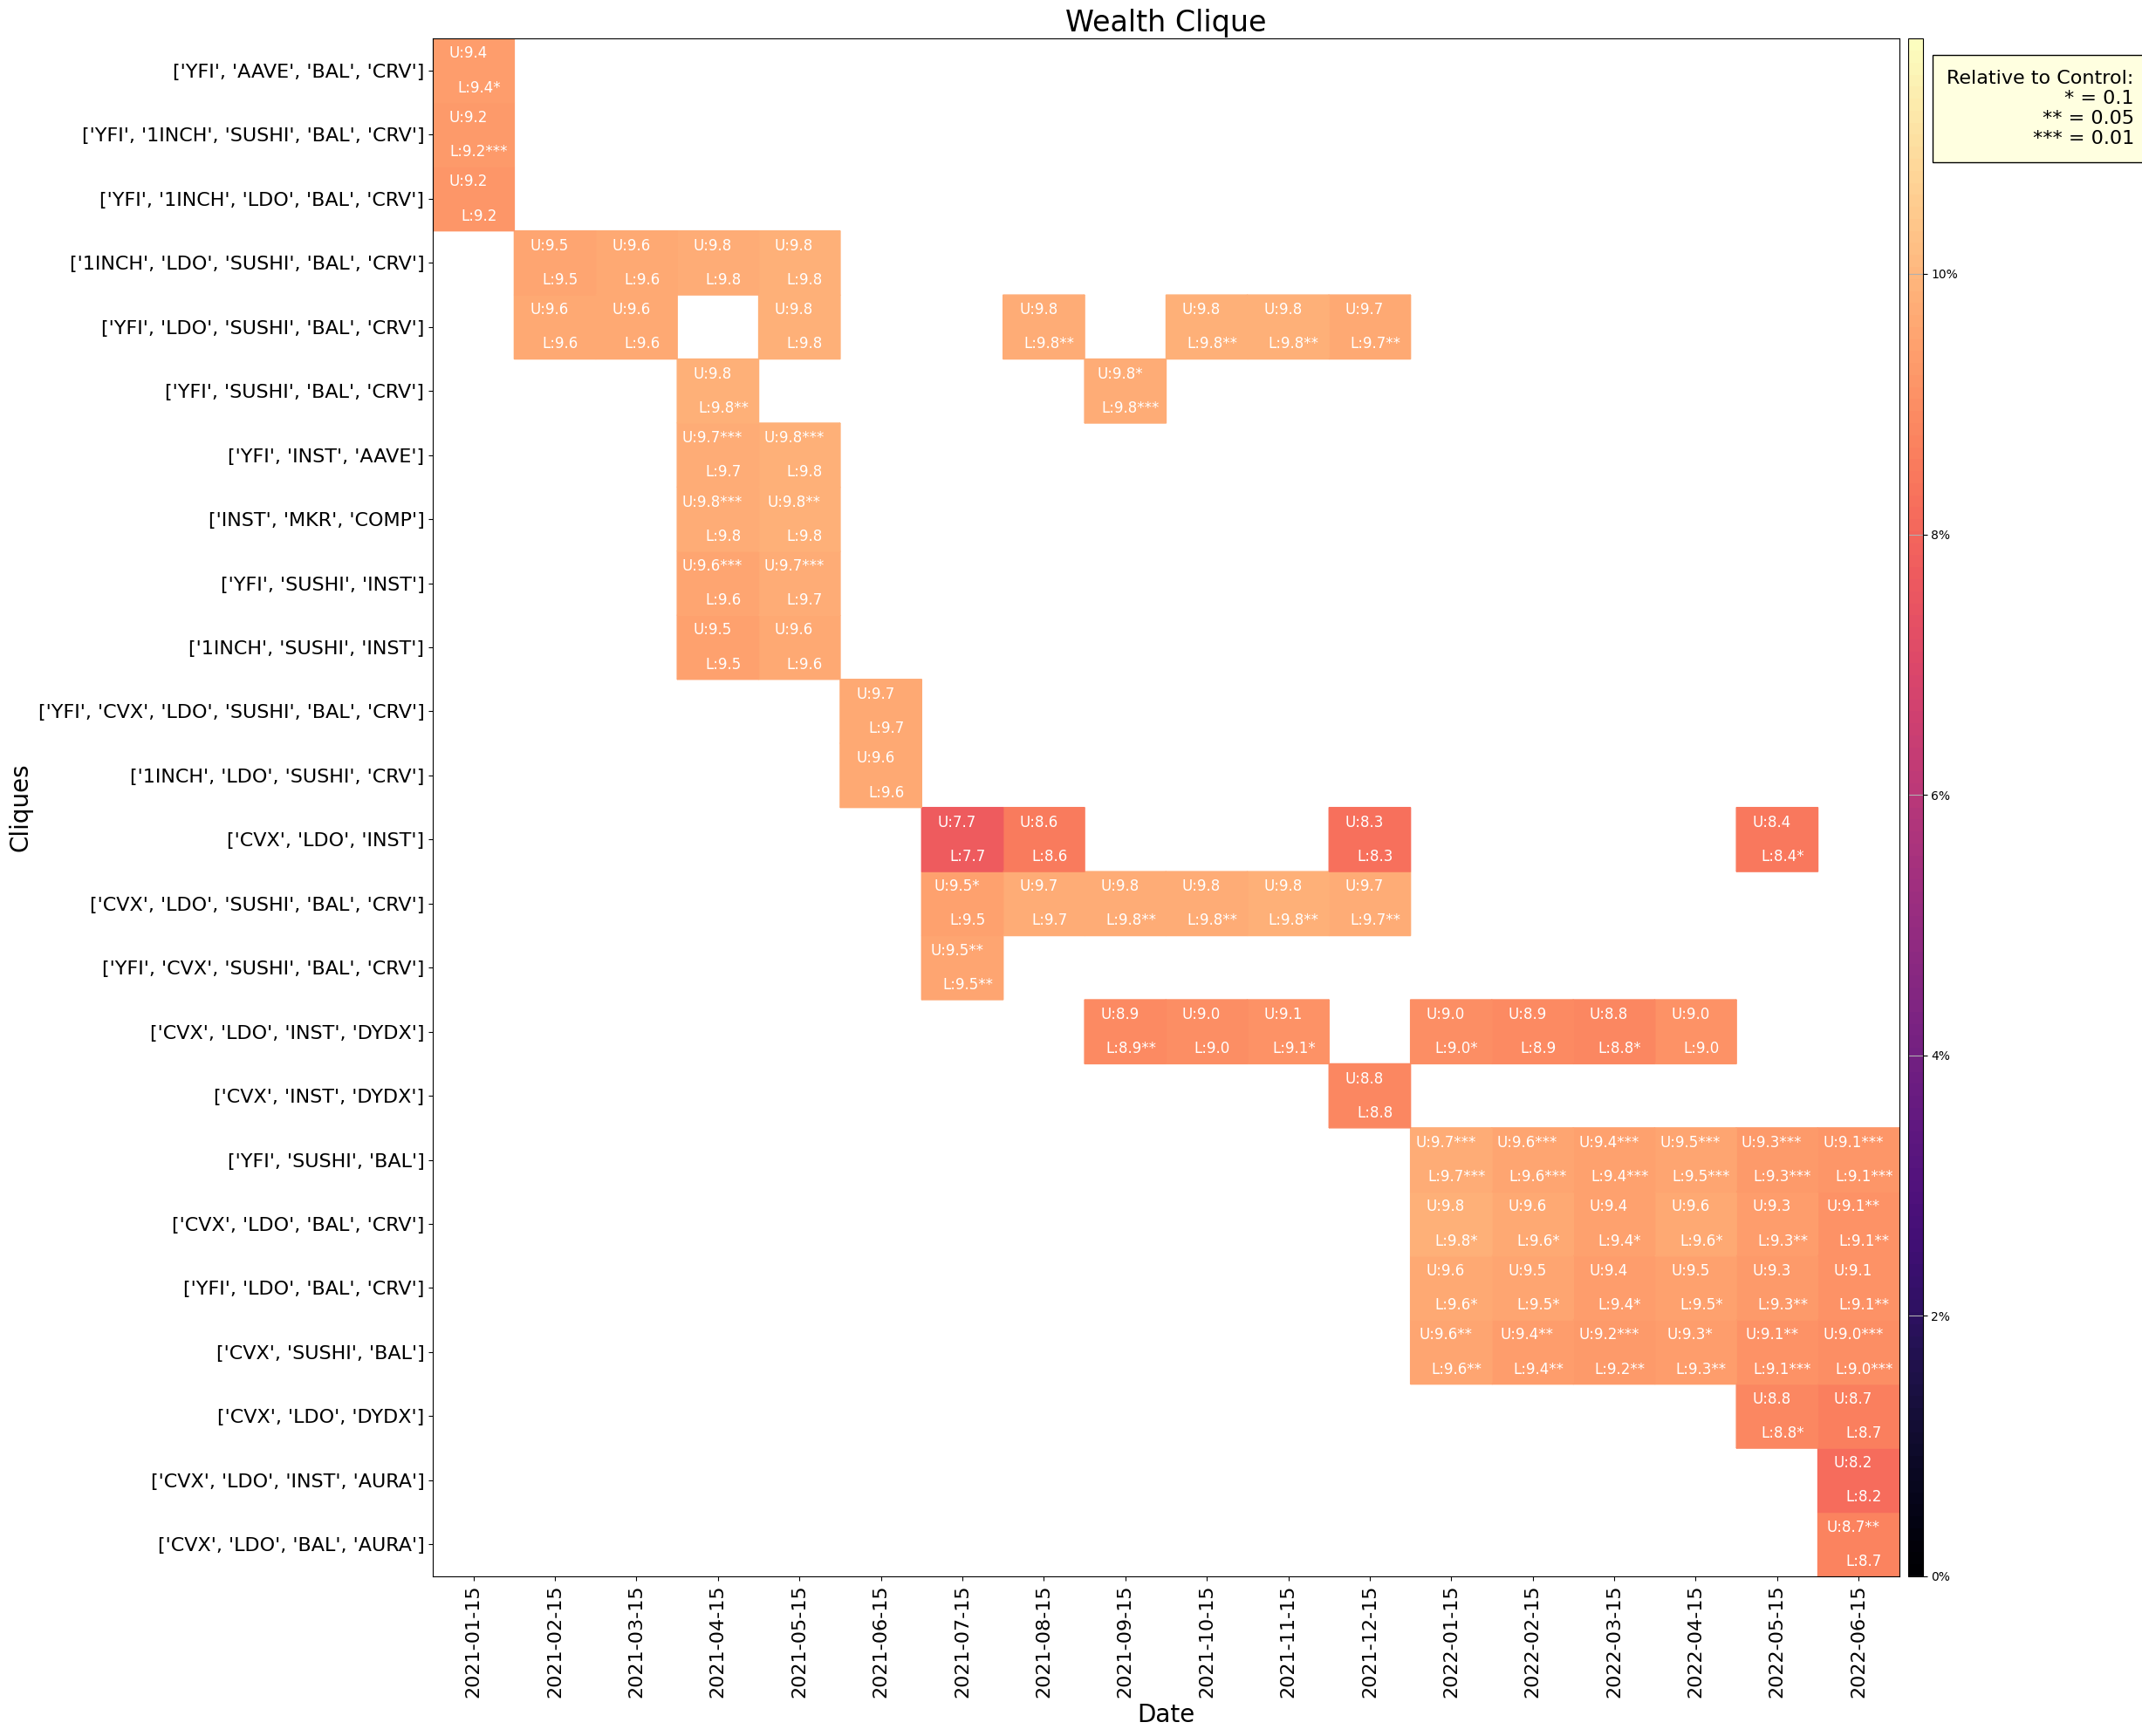

In [53]:
plot_heatmap_chart(metric_dataframes, metric_name='wealth_clique', pct=False, log=True, save=False, show=True) 

### Fig: gini_wealth_clique

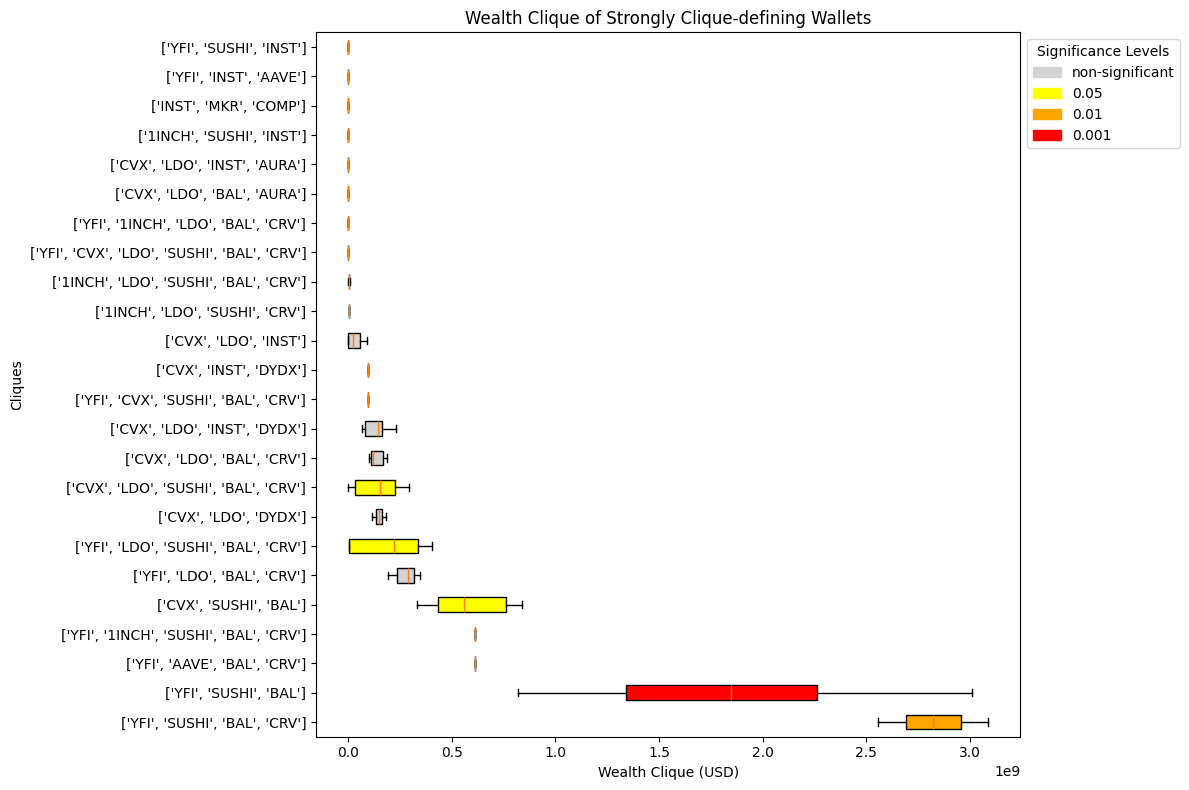

In [55]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='lower_bound', group='sample', output_path="../output/cliques/", save=True, show=True)

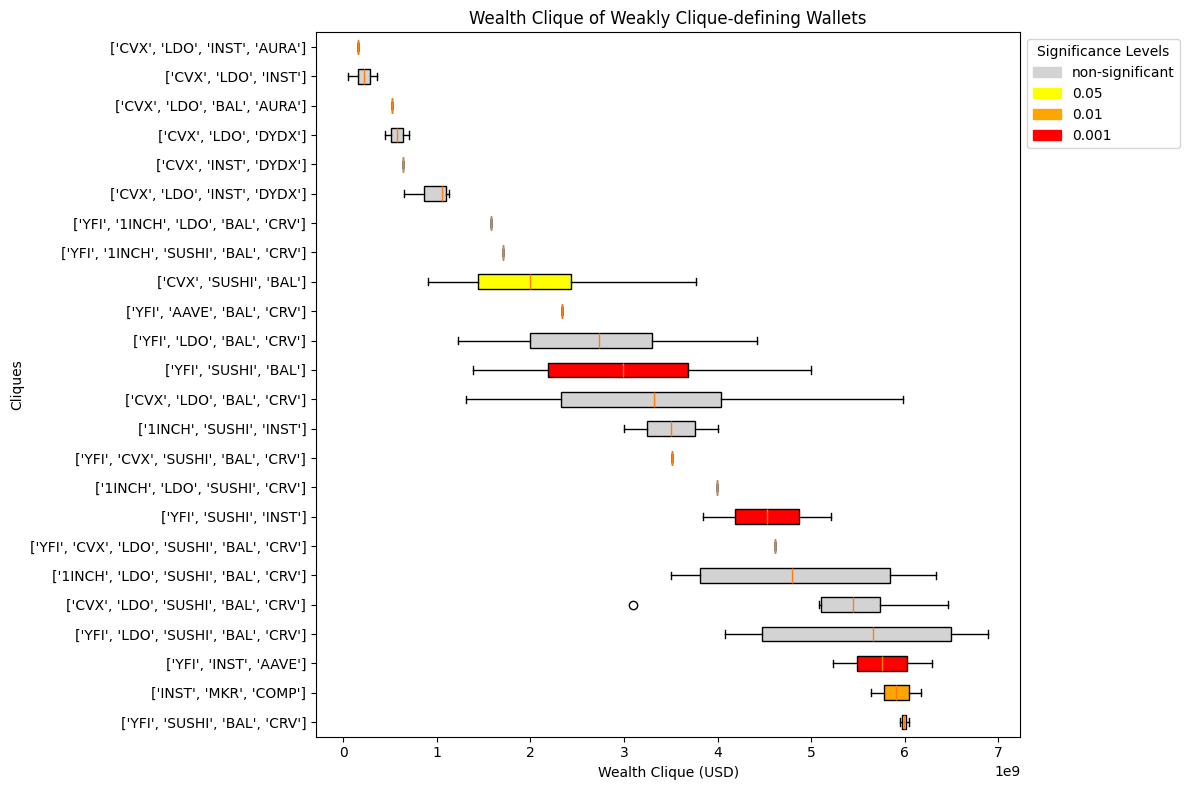

In [56]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='upper_bound', group='sample', output_path="../output/cliques/", save=True, show=True)

### Fig: median_wealth_level_clique || Note: This is the median position size in a clique

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


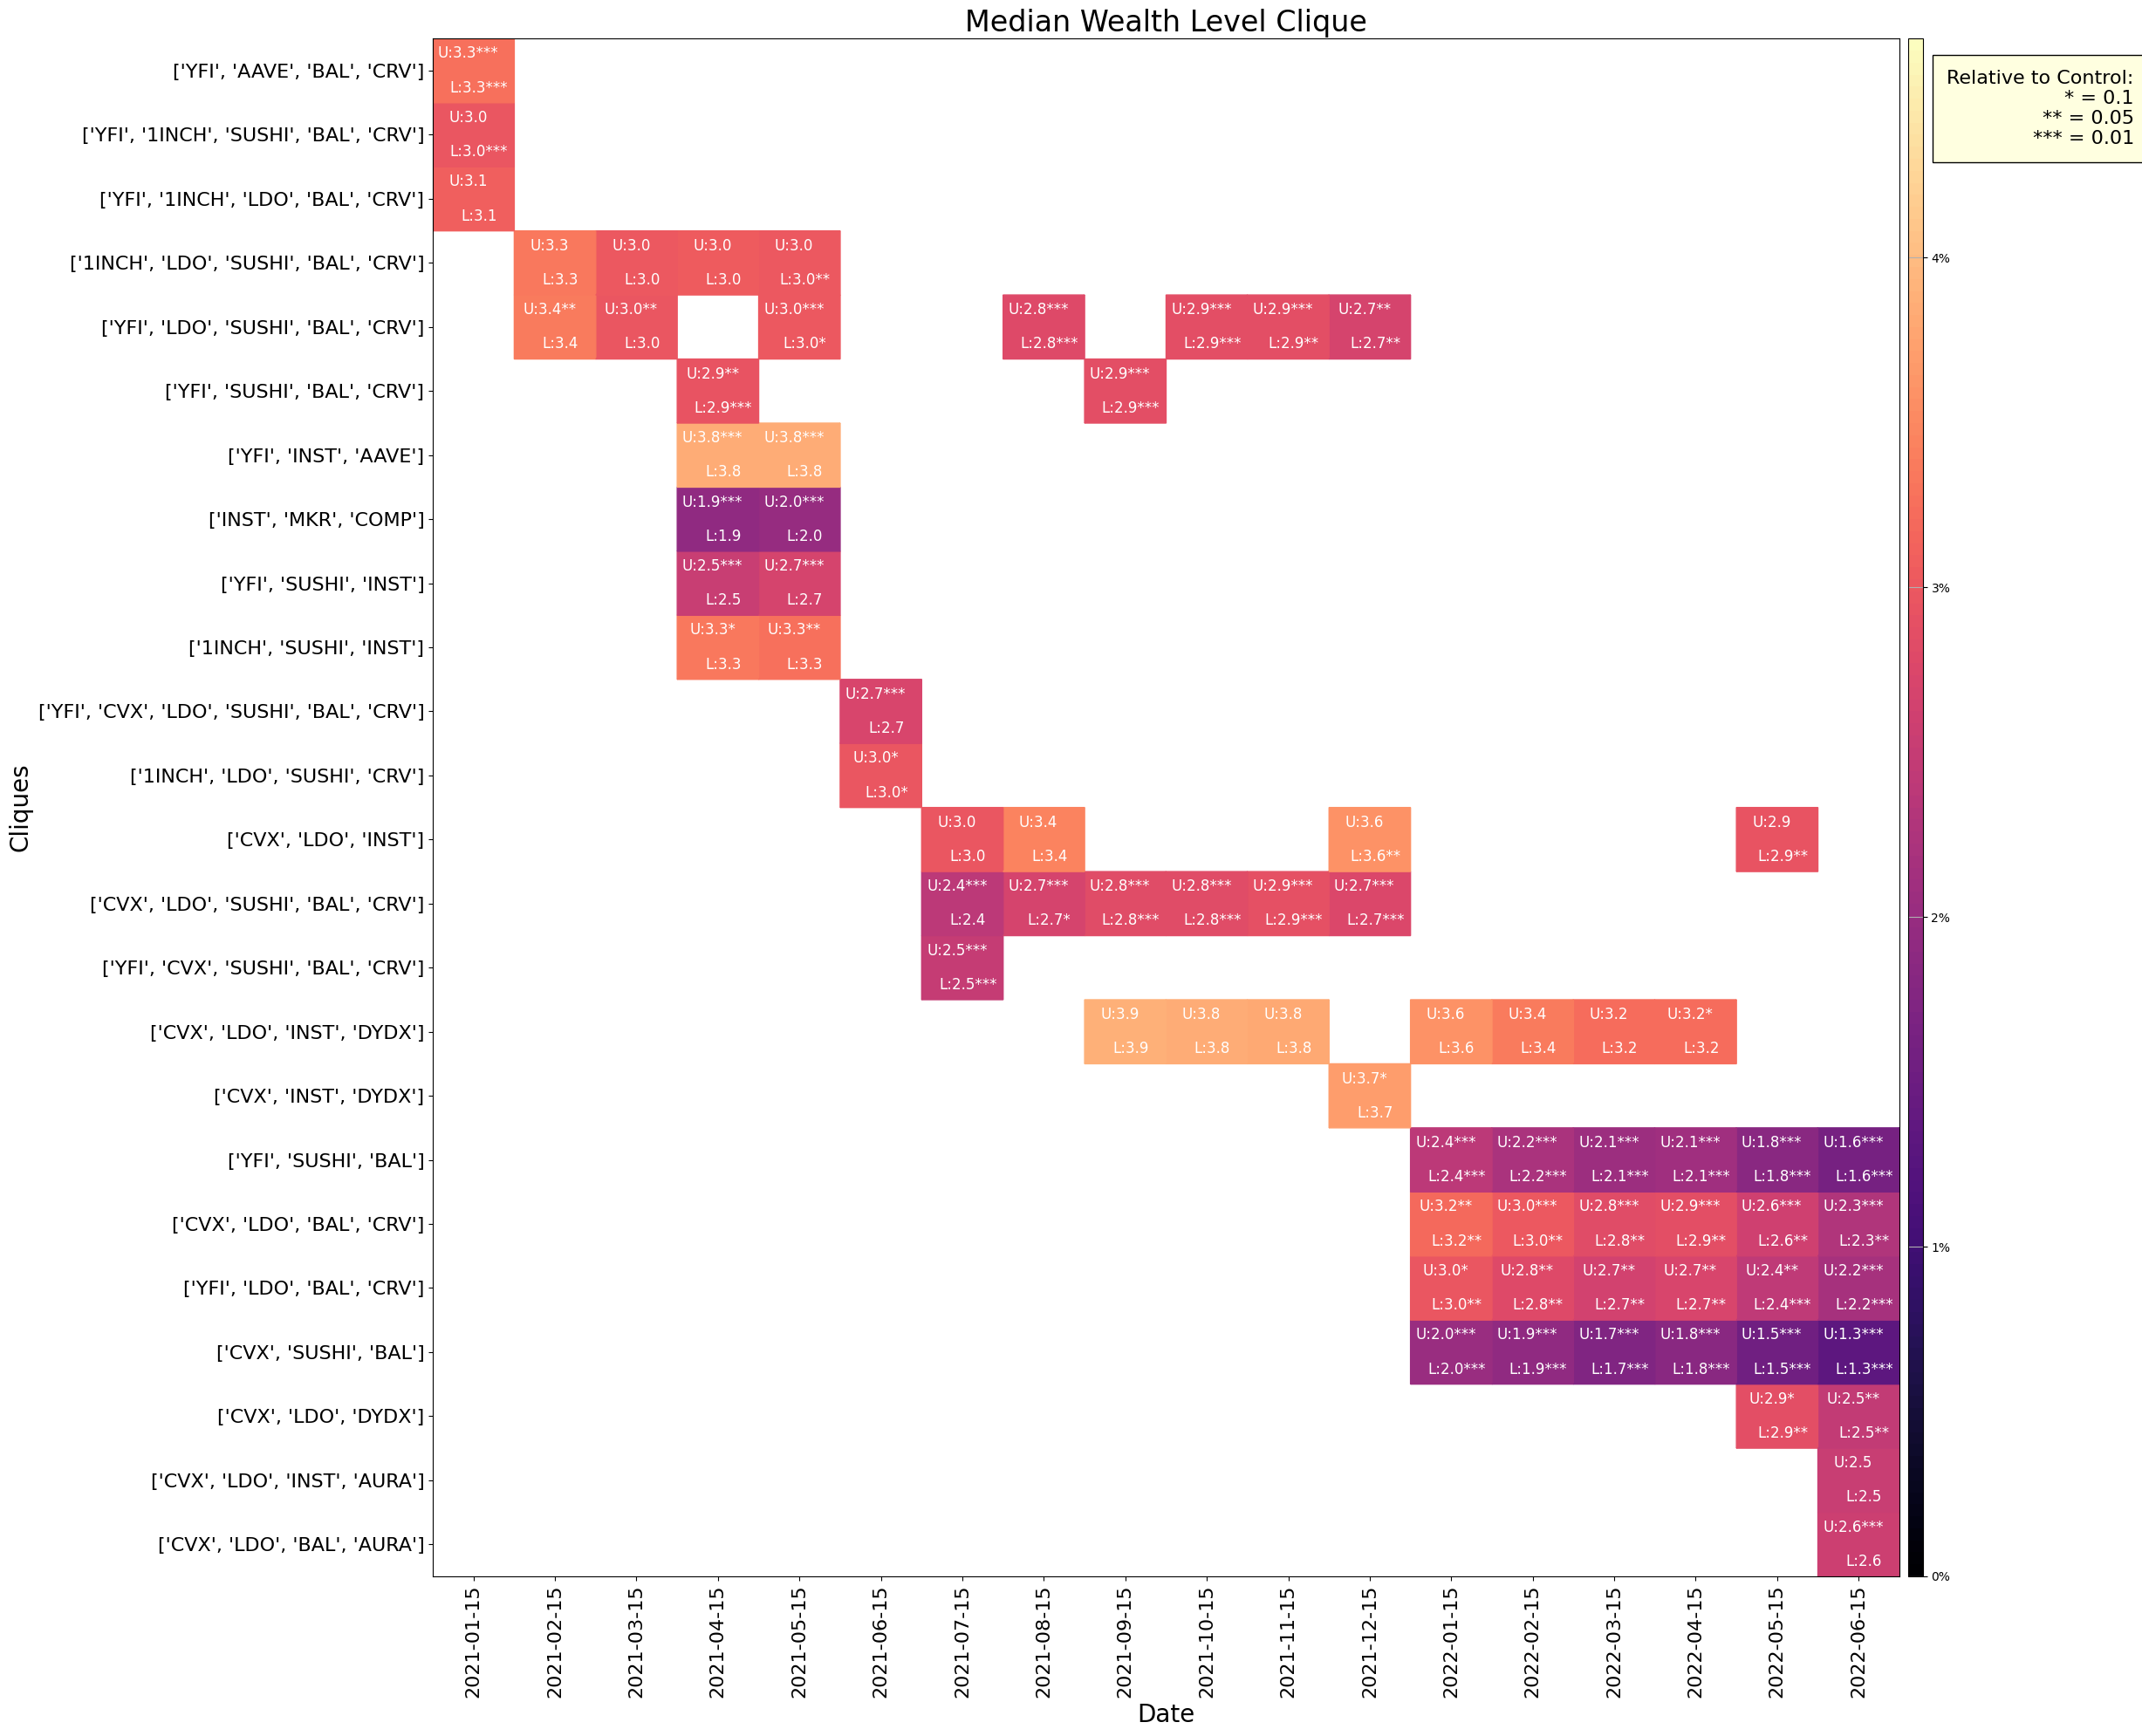

In [58]:
plot_heatmap_chart(metric_dataframes, metric_name='median_wealth_level_clique', pct=False, log=True, save=False, show=True)

### Fig: median_no_assets_clique


/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


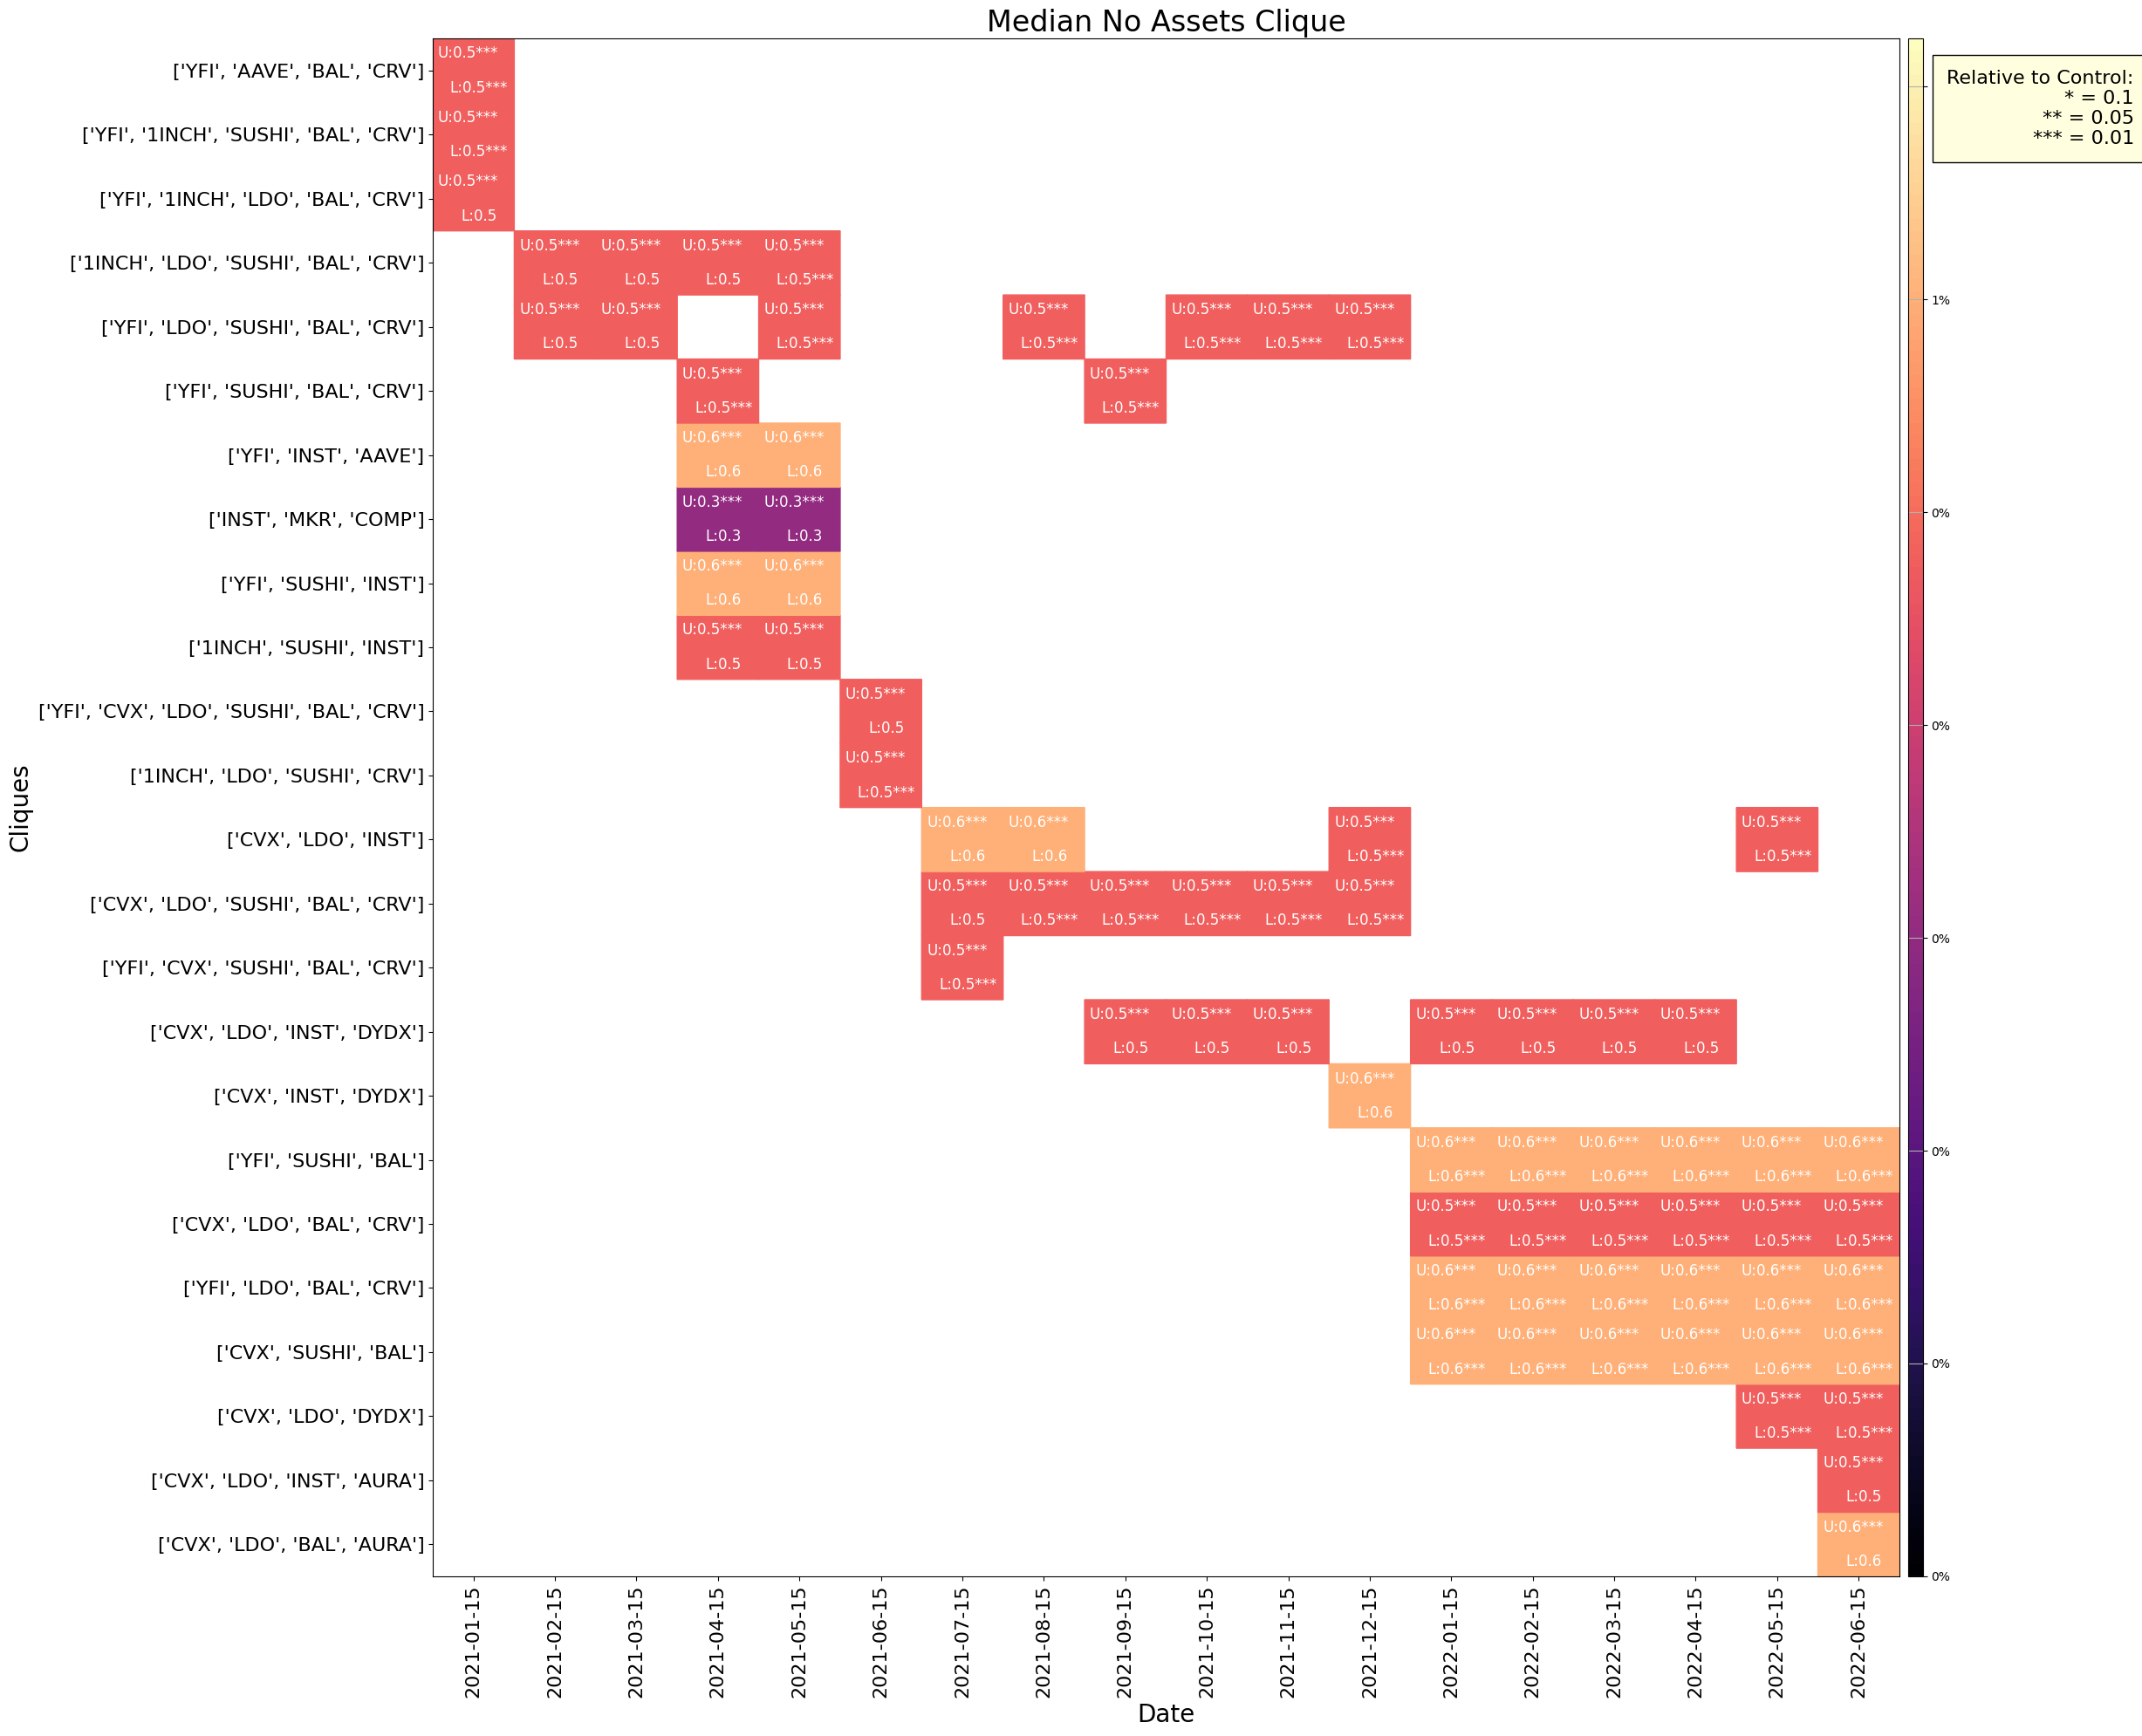

In [59]:
plot_heatmap_chart(metric_dataframes, metric_name='median_no_assets_clique', pct=False, save=False, show=True)

### Fig: Distribution of Labels

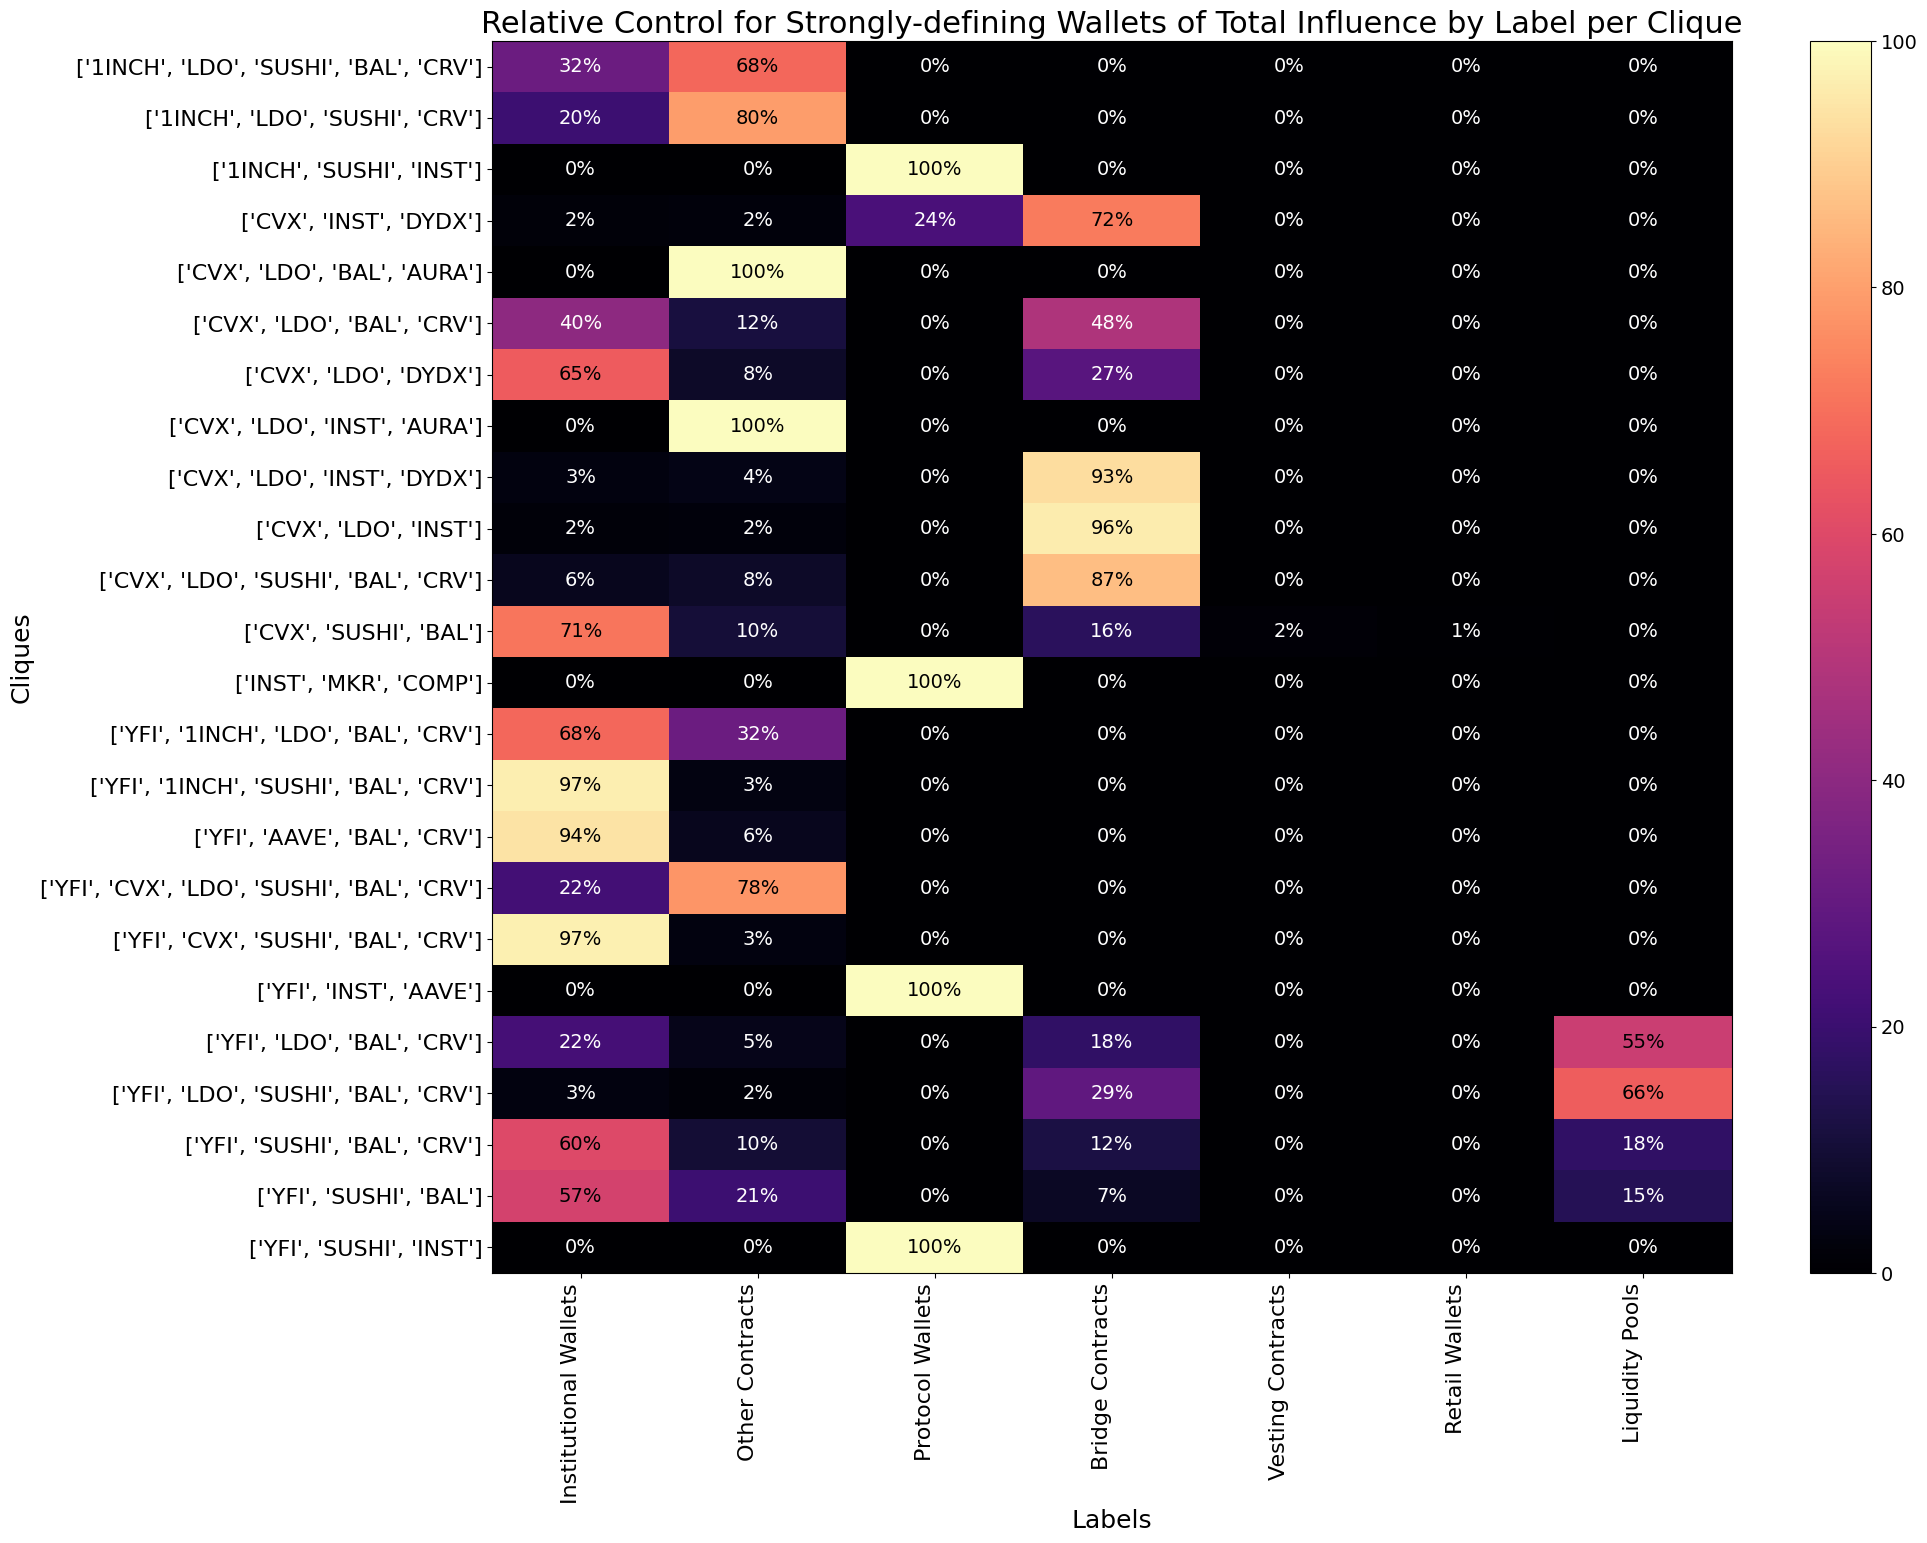

In [61]:
plot_heatmap_labels(metric_dataframes, method='lower_bound', group='sample', colormap='magma', output_path='../output/cliques')

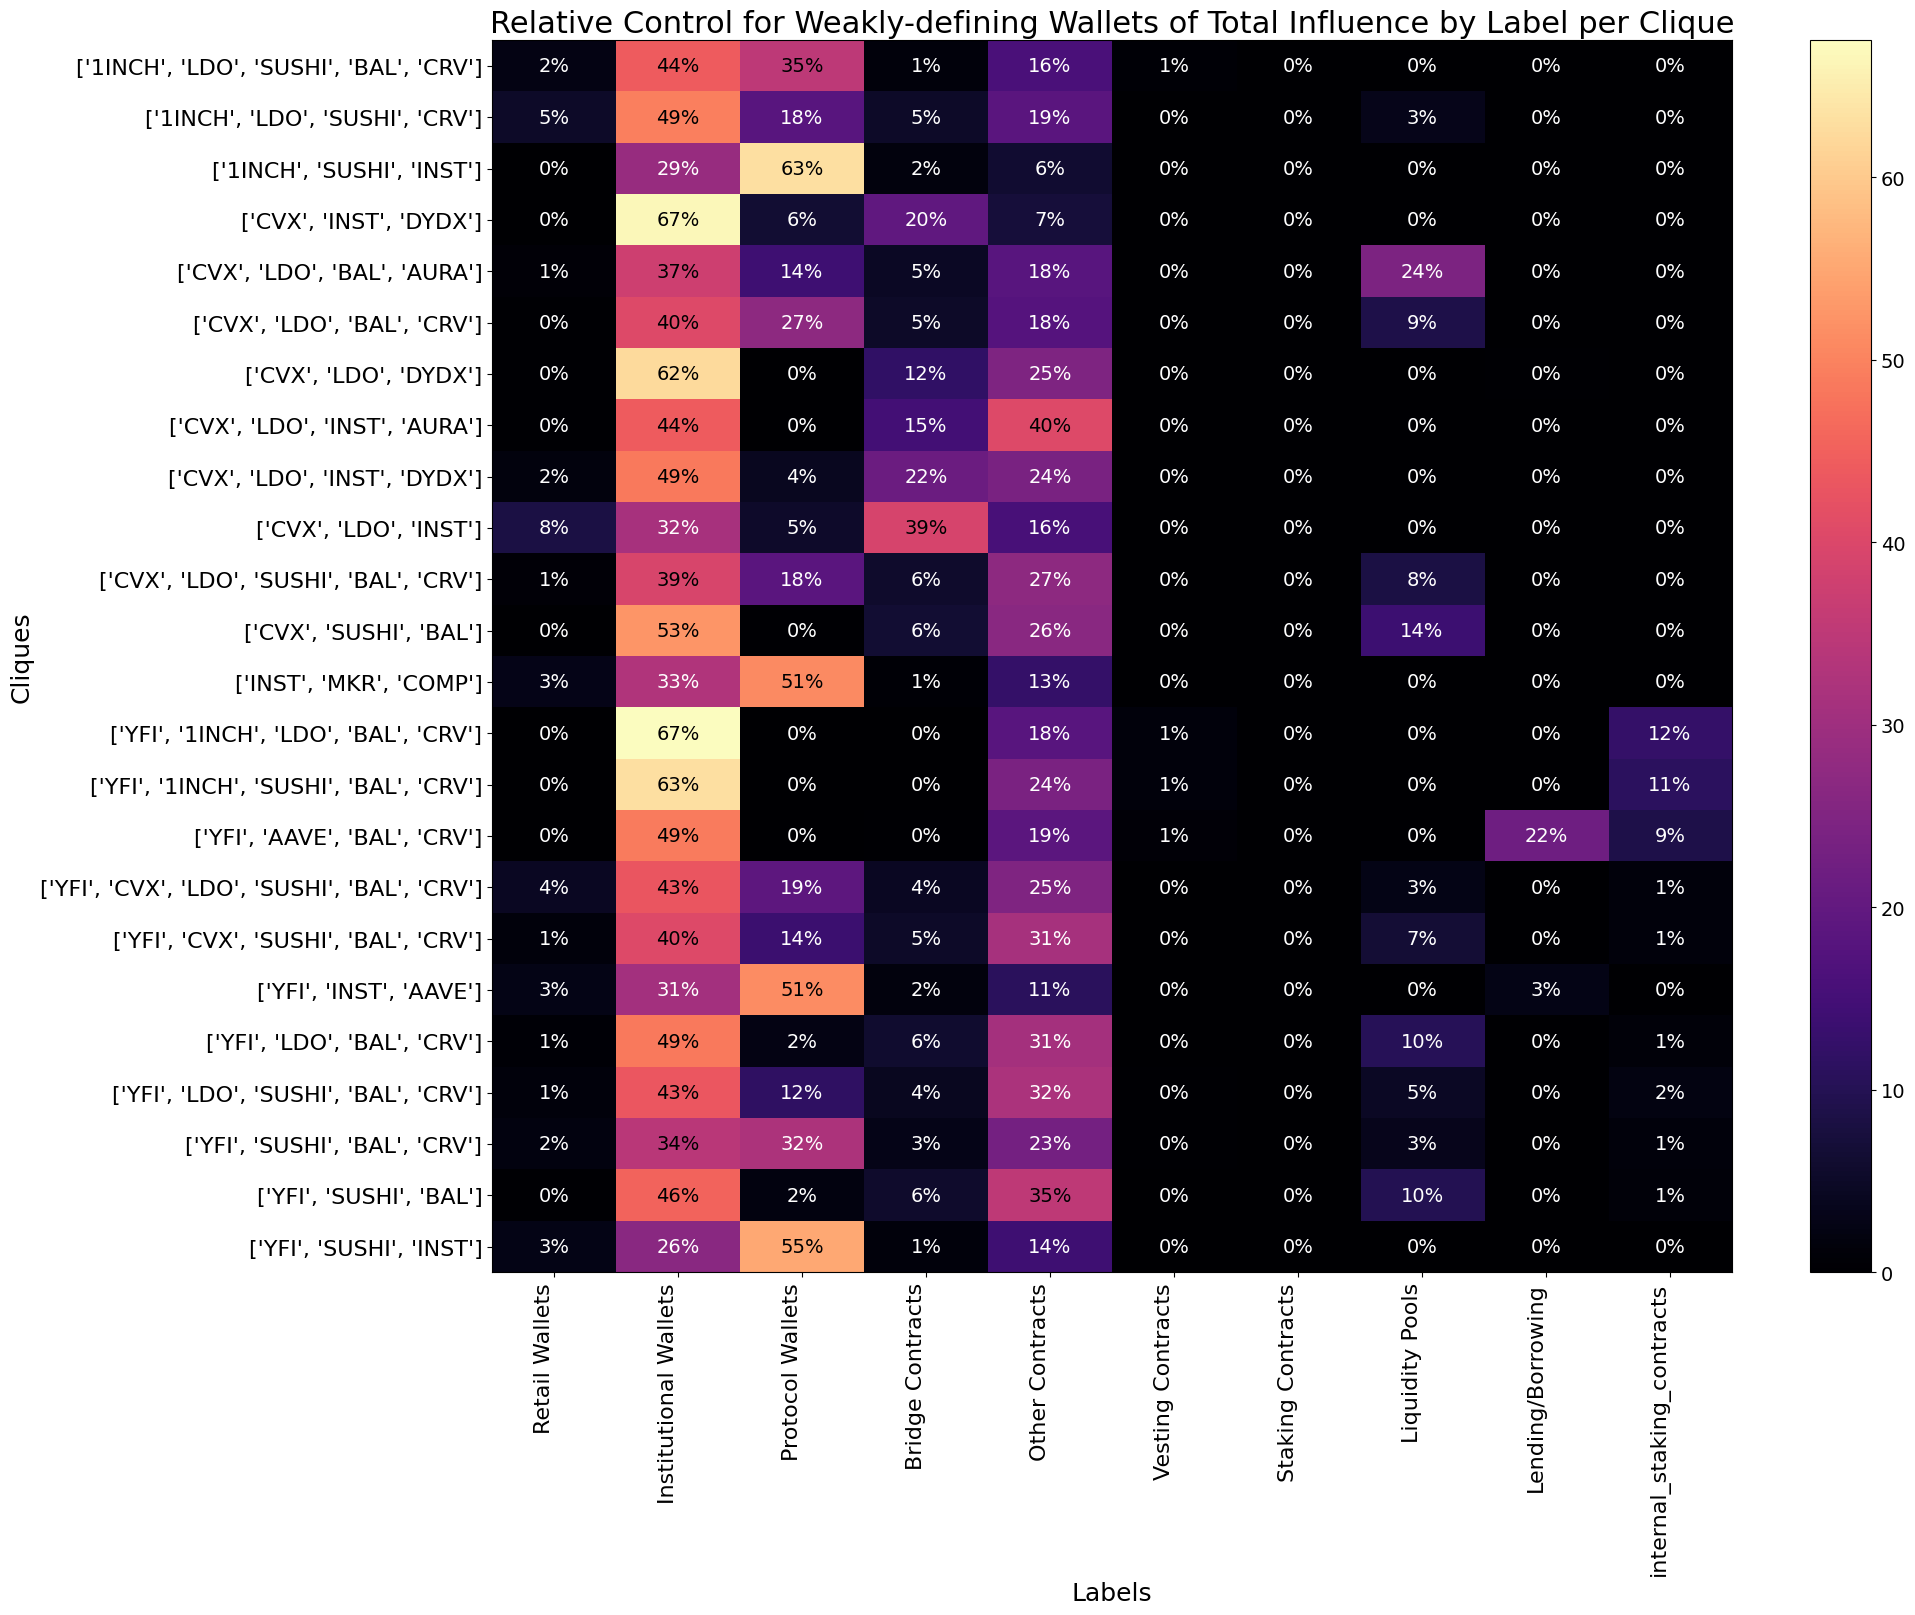

In [60]:
plot_heatmap_labels(metric_dataframes, method='upper_bound', group='sample', colormap='magma', output_path='../output/cliques')